In [1]:
# global
homedir = "/u/az6922/"

import random
def generate_srclinkratearr(rttaverage,size,rseed=0):
    random.seed(rseed)
    rateaverage = (rttaverage-1)//2
    diffarr = [random.randint(-rateaverage+1, rateaverage) for _ in range(size)]
    # required_sum = rateaverage * size
    # current_sum = sum(ratearr)1_
    # last_rate = required_sum - current_sum
    # ratearr.append(last_rate)
    ratearr = [rateaverage+diff for diff in diffarr]
    return ratearr

import pickle
import os
def load_stats(dir,q=1,numqueues=2,numports=2,p=0):
    timelist = list()
    bufferpctlist = list()
    qlenlist = list()
    sentlist = list()
    thptlist = list()
    droplist = list()
    threslist = list()
    for i in range(numports * numqueues):
        qlenlist.append(list())
        sentlist.append(list())
        thptlist.append(list())
        droplist.append(list())
        threslist.append(list())

    with open(dir+"tor.tr", 'r') as f:
        lines = f.readlines()[1:-1]
        for line in lines:
            if line.startswith("\x00"): continue
            tokens = line.split()
            timestamp = int(tokens[0])
            buffer = float(tokens[2])
            for i in range(numports * numqueues):
                qlenlist[i].append(int(tokens[3+i*5]))
            for i in range(numports * numqueues):
                thptlist[i].append(float(tokens[3+i*5+1]))
            for i in range(numports * numqueues):
                sentlist[i].append(int(tokens[3+i*5+2]))
            for i in range(numports * numqueues):
                droplist[i].append(int(tokens[3+i*5+3]))
            for i in range(numports * numqueues):
                threslist[i].append(int(tokens[3+i*5+4]))
            timelist.append(timestamp)
            bufferpctlist.append(buffer)
    
    return [timelist,qlenlist[p*numqueues+q],sentlist[p*numqueues+q],thptlist[p*numqueues+q],droplist[p*numqueues+q],threslist[p*numqueues+q]]

def load_output_log(dir):
    # LOG +1.19381e+10ns 316500
    timelist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("LOG"): continue
            tokens = line.split()
            timelist.append(float(tokens[1].rstrip('ns')))
            minbufferlist.append(int(tokens[2]))
    return [timelist,minbufferlist]

def load_output_log_probe(dir):
    # +...ns(time),cmsa,sent,totalbw,n,m,b
    timelist = list()
    cmsalist = list()
    sentlist = list()
    targetlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            timelist.append(float(tokens[0].rstrip('ns')))
            cmsa=int(tokens[1])
            cmsalist.append(cmsa)
            sentlist.append(int(tokens[2]))
            totalbw=float(tokens[3])
            n=int(tokens[4])
            m=float(tokens[5])
            b=float(tokens[6])
            target=float(tokens[7].rstrip('\n'))
            targetlist.append(target)
    return [timelist,cmsalist,sentlist,targetlist]

def load_output_data(dir):
    # DATA,+1.1099e+11ns,93000,6241500,19500
    cmsalist = list()
    sentlist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("DATA"): continue
            tokens = line.split(',')
            cmsalist.append(int(tokens[2]))
            sentlist.append(int(tokens[3]))
            minbufferlist.append(int(tokens[4]))
    return [cmsalist,sentlist,minbufferlist]

def load_output_convergence(dir):
    # +5.54904e+10ns,39800,6243000,6243001,16500,97,0,0,0,39800,0
    # time,cmsa,sent,3,minbuffer,5,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    # timelist = list()
    # cmsalist = list()
    # sentlist = list()
    # minbufferlist = list()
    # mlist = list()
    # blist = list()
    # targetlist = list()
    # minfulllist = list()
    # maxnonfulllist = list()

    # +2.7799e+11ns,45,90950,6241500,6243001,4500,528,0,0,0,90950,90350
    # time,proberid,cmsa,sent,4,minbuffer,6,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    timedict = dict()
    cmsadict = dict()
    sentdict = dict()
    minbufferdict = dict()
    mdict = dict()
    bdict = dict()
    targetdict = dict()
    minfulldict = dict()
    maxnonfulldict = dict()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            if tokens[1]=="pass" or tokens[1]=="maxbuffer": continue
            proberid = int(tokens[1])
            if proberid not in timedict:
                timedict[proberid] = list()
                cmsadict[proberid] = list()
                sentdict[proberid] = list()
                minbufferdict[proberid] = list()
                mdict[proberid] = list()
                bdict[proberid] = list()
                targetdict[proberid] = list()
                minfulldict[proberid] = list()
                maxnonfulldict[proberid] = list()
            timedict[proberid].append(float(tokens[0].rstrip('ns')))
            cmsadict[proberid].append(int(tokens[2]))
            sentdict[proberid].append(int(tokens[3]))
            minbufferdict[proberid].append(int(tokens[5]))
            mdict[proberid].append(float(tokens[7]))
            bdict[proberid].append(float(tokens[8]))
            targetdict[proberid].append(float(tokens[9]))
            minfulldict[proberid].append(int(tokens[10]))
            maxnonfulldict[proberid].append(int(tokens[11]))
    # return [timelist,cmsalist,sentlist,minbufferlist,mlist,blist,targetlist,minfulllist,maxnonfulllist]
    return [timedict,cmsadict,sentdict,minbufferdict,mdict,bdict,targetdict,minfulldict,maxnonfulldict]

def load_bct(dir,numsender,startsender,simend,numburst):
    startlist = list()
    endlist = list()
    for i in range(numsender):
        with open(f"{dir}gpt_sender{i+startsender}_app0.tr",'r') as f:
            lines = f.readlines()
            for j in range(numburst):
                if len(lines) > j: startlist.append(int(lines[j].split()[0]))
                if len(lines) < numburst*2 and (len(lines)-numburst) < (j+1):
                    endlist.append(simend*1000000)
                else:
                    endlist.append(int(lines[j+numburst].split()[0]))
    return [startlist,endlist]

def load_gpt(dir,numsender):
    # 2100 FlowId 1000 TotalBytes 5611000 SocketState 4 TcpCongState 0 GoodputRxBytes 369240 ThisGoodputRxBytes 369240
    returnlist = list()
    for i in range(numsender):
        timemslist = list()
        thptlist = list()
        gptlist = list()
        with open(f"{dir}gpt_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split()
                timemslist.append(int(tokens[0]))
                thptlist.append(int(tokens[4]))
                gptlist.append(int(tokens[10]))
        returnlist.append([timemslist,thptlist,gptlist])
    return returnlist

def load_fct(dir,numsender,startsender):
    # 51022105 FlowId 20000 TotalBytes 5241760
    # 71516996 FlowId 20000 TotalBytes 10000000
    returnlist = list()
    for i in range(startsender,startsender+numsender):
        with open(f"{dir}fct_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                returnlist.append(0)
            else:
                startfct = int(lines[0].split()[0])
                endfct = int(lines[1].split()[0])
                returnlist.append(endfct-startfct)
    return returnlist

def load_output_zero(fdir):
    intervallist = list()
    shouldstart = False
    with open(f"{fdir}output.tr",'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            if shouldstart:
                intervalstart = int(tokens[0])
                interval = int(tokens[1])
                intervallist.append([intervalstart,intervalstart+interval])
            else:
                if tokens[0]=="DesignZeroVec":
                    shouldstart = True
    return intervallist

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

def linear_regression(xarr,yarr):
    x = np.array(xarr)
    y = np.array(yarr)

    # Number of data points
    N = len(x)

    # Calculate the slope (m) and intercept (b) using the formulas
    # m = (N * Σ(xi * yi) - Σxi * Σyi) / (N * Σ(xi^2) - (Σxi)^2)
    # b = (Σyi - m * Σxi) / N

    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    # # Display the equation of the best-fit line
    # print(f"Slope: {m:.2f}, Intercept: {b:.2f}")

    # # Create the best-fit line using the model equation
    # y_pred = m * x + b

    return [m,b]

def get_targetbw(cca,nfstr,rttstr):
    with open(f"{homedir}Buffer/experiments/bulk_dec2624/cca{cca}_maxthpt.txt") as fread:
        lines = fread.readlines()
        for line in lines:
            tokens = line.split(',')
            if nfstr==tokens[0] and rttstr==tokens[1]:
                targetbw_raw = float(tokens[2])
                break
    targetbw = int(((targetbw_raw // 1500)+1) * 1500+1)
    return targetbw

def merge_intervals(intervals):
    if not intervals:
        return []

    merged = [intervals[0]]  # Start with the first interval

    for start, end in intervals[1:]:
        last_start, last_end = merged[-1]

        # If the end of the last interval matches the start of the new interval, merge them
        if last_end == start:
            merged[-1] = (last_start, end)  # Extend the last interval
        else:
            merged.append((start, end))  # Otherwise, add it as a new interval

    return merged

In [131]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
# ccanamearr=["cubic","realmix","twomix","bbr"]
ccanamearr=["twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

In [9]:
for rtt in rttarr:
    for numflow in numflowarr:
        ratearr = generate_srclinkratearr(rtt,numflow,rseed=confseed)
        for ccaname in ccanamearr:
            conffile = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/configurations/cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}.conf"

            if ccaname=="cubic":
                myccaarr = [4]
            elif ccaname=="bbr":
                myccaarr = [5]
            elif ccaname=="twomix":
                myccaarr = list()
                for cca,count in twomixdict.items():
                    for i in range(count):
                        myccaarr.append(cca)
            elif ccaname=="realmix":
                myccaarr = list()
                for cca,count in realmixdict.items():
                    for i in range(count):
                        myccaarr.append(cca)
                
            with open(conffile,'w') as f:
                f.write(f"{numflow}\n")
                for inf,nf in enumerate(range(numflow)):
                    cca = myccaarr[random.randint(0,len(myccaarr)-1)]
                    f.write(f"0\t{inf}\tLong\t100001\t0\t{cca}\t1\t{ratearr[inf]}\t1\n")

In [5]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/thpt.conf"
with open(file,'w') as f:
    for cca in ccanamearr:
        for numflow in numflowarr:
            for rtt in rttarr:
                configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
                conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
                
                BDP = int(rtt/1000 * midbw * 1000000/8)
                totalbuffer = BDP
                startbuffer = totalbuffer
                targetbw = int(totalbuffer//10)

                # Titrate
                pawmode="pa"
                qdisctype="Fifo"
                bufferalg="111"
                confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
                logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # DT8
                pawmode="pa"
                qdisctype="Fifo"
                bufferalg="101"
                alpha=8
                confstr = f"--alphaString={alpha} --targetBW={targetbw}"
                logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # CoDel
                pawmode="fixed"
                qdisctype="CoDel"
                bufferalg="101"
                alpha=8
                confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
                logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # PIE
                pawmode="fixed"
                qdisctype="Pie"
                bufferalg="101"
                alpha=8
                confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
                logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # Static
                # if cca=="cubic" or cca=="bbr":
                #     pawmode="fixed"
                #     qdisctype="Fifo"
                #     bufferalg="111"

                #     BDP = int(rtt/1000 * midbw * 1000000/8)
                #     if cca=="cubic":
                #         startbuffer = int(3/7*BDP)
                #     elif cca=="bbr":
                #         startbuffer = int(1/4*BDP)

                #     confstr = f"--targetBW={targetbw}"
                #     logstr = f"{totalbuffer}_{bufferalg}_0_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                #     f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # DT1
                pawmode="pa"
                qdisctype="Fifo"
                bufferalg="101"
                alpha=1
                confstr = f"--alphaString={alpha} --targetBW={targetbw}"
                logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [ ]:
datadict = dict()
for cca in ccanamearr:
    for numflow in numflowarr:
        for rtt in rttarr:
            configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
            datadict[configname] = dict()
            datadict[configname]["titrate"] = dict()
            datadict[configname]["dt8"] = dict()
            datadict[configname]["codel"] = dict()
            datadict[configname]["pie"] = dict()
            datadict[configname]["dt1"] = dict()

            if cca=="cubic" or cca=="realmix":
                totalbuffer = 5000000
                startbuffer = totalbuffer//2
                targetbw = 0
            elif cca=="bbr" or cca=="twomix":
                BDP = int(rtt/1000 * midbw * 1000000/8)
                totalbuffer = BDP
                startbuffer = totalbuffer
                targetbw = int(totalbuffer//10)

            # Titrate
            pawmode="pa"
            qdisctype="Fifo"
            bufferalg="111"
            confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
            logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["titrate"] = statslist

            # DT8
            pawmode="pa"
            qdisctype="Fifo"
            bufferalg="101"
            alpha=8
            confstr = f"--alphaString={alpha} --targetBW={targetbw}"
            logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["dt8"] = statslist

            # CoDel
            pawmode="fixed"
            qdisctype="CoDel"
            bufferalg="101"
            alpha=8
            confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
            logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["codel"] = statslist

            # PIE
            pawmode="fixed"
            qdisctype="Pie"
            bufferalg="101"
            alpha=8
            confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
            logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["pie"] = statslist
            
            # DT1
            pawmode="pa"
            qdisctype="Fifo"
            bufferalg="101"
            alpha=1
            confstr = f"--alphaString={alpha} --targetBW={targetbw}"
            logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["dt1"] = statslist

In [68]:
with open(f'{homedir}/Buffer/experiments/nsdi26sp/design_thpt/thpt_1_incomplete.pickle', 'wb') as handle:
    pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [132]:
with open(f'{homedir}/Buffer/experiments/nsdi26sp/design_thpt/thpt_1_incomplete.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

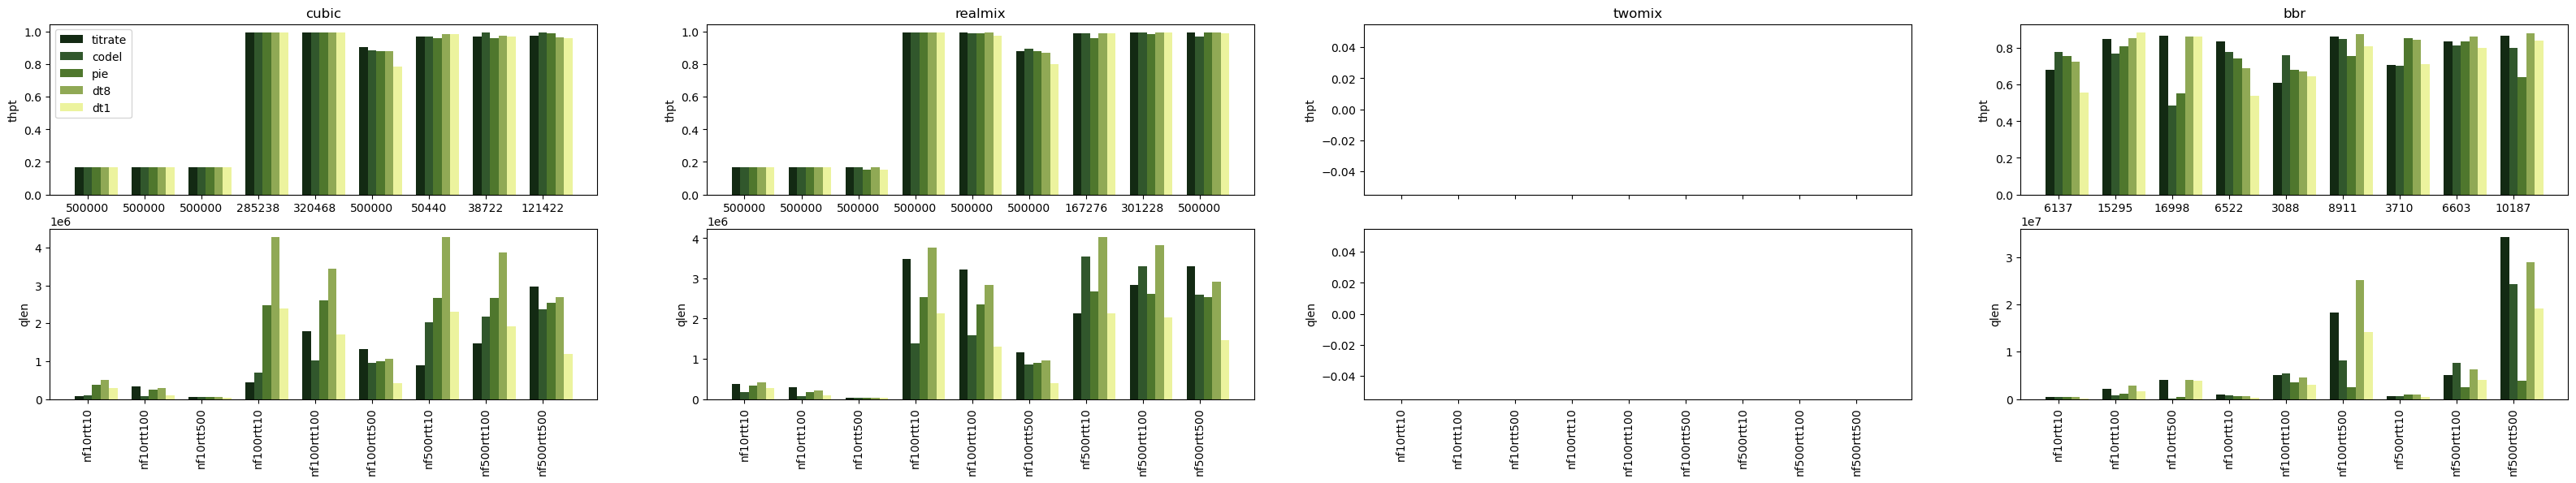

In [21]:
# schemearr = ["titrate","codel","pie","dt8","dt1"]
# # ylimarr = [0.8,0.4,0.8,0.8,0.6,0.8]
# arrstart = 0 # 99000 # 0 # 95000
# arrend = 500000 # 101000 # 200000 # 105000
# # [arrstart:arrend]
# nr = 2
# nc = len(ccanamearr)
# fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

# simlendict = dict()
# for icca,ccaname in enumerate(ccanamearr):
#     simlendict[icca] = list()

#     thptdata = dict()
#     qlendata = dict()
#     for scheme in schemearr:

#         thptdata[scheme] = list()
#         qlendata[scheme] = list()
#         for numflow in numflowarr:
#             for rtt in rttarr:
#                 configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"

#                 datator = datadict[configname][scheme]
#                 if len(datator)==0: 
#                     thptdata[scheme].append(0)
#                     qlendata[scheme].append(0)
#                     continue

#                 time = datator[0][arrstart:arrend]
#                 qlen = datator[1][arrstart:arrend]
#                 sent = datator[2][arrstart:arrend]
#                 thpt = datator[3][arrstart:arrend]
#                 drop = datator[4][arrstart:arrend]
#                 thres = datator[5][arrstart:arrend]
                
#                 if scheme=="titrate": simlendict[icca].append(len(time))

#                 thptdata[scheme].append(sum(thpt)/len(thpt))
#                 qlendata[scheme].append(sum(qlen)/len(qlen))

#     num_groups = len(numflowarr)*len(rttarr)
#     num_bars = len(schemearr)
#     bar_width = 0.15

#     x = np.arange(num_groups)

#     colors = ['#132a13', '#31572c', '#4f772d', '#90a955', '#ecf39e']
#     labels = schemearr

#     for i,scheme in enumerate(schemearr):
#         axs[0,icca].bar(x + i * bar_width, thptdata[scheme], width=bar_width, label=labels[i], color=colors[i])
#         axs[1,icca].bar(x + i * bar_width, qlendata[scheme], width=bar_width, label=labels[i], color=colors[i])

#     xticklabelarr = list()
#     for numflow in numflowarr:
#         for rtt in rttarr:
#             xticklabelarr.append(f"nf{numflow}rtt{rtt}")
#     axs[0,icca].set_xticks(x + bar_width)  # Center labels
#     axs[0,icca].set_xticklabels(simlendict[icca])
#     axs[0,icca].set_ylabel("thpt")
#     axs[0,icca].set_title(f"{ccaname}")
#     # axs[0,icca].set_ylim(ylimarr[icca],None)

#     axs[1,icca].set_xticks(x + bar_width)  # Center labels
#     axs[1,icca].set_xticklabels(xticklabelarr, rotation=90)
#     axs[1,icca].set_ylabel("qlen")

# axs[0,0].legend()

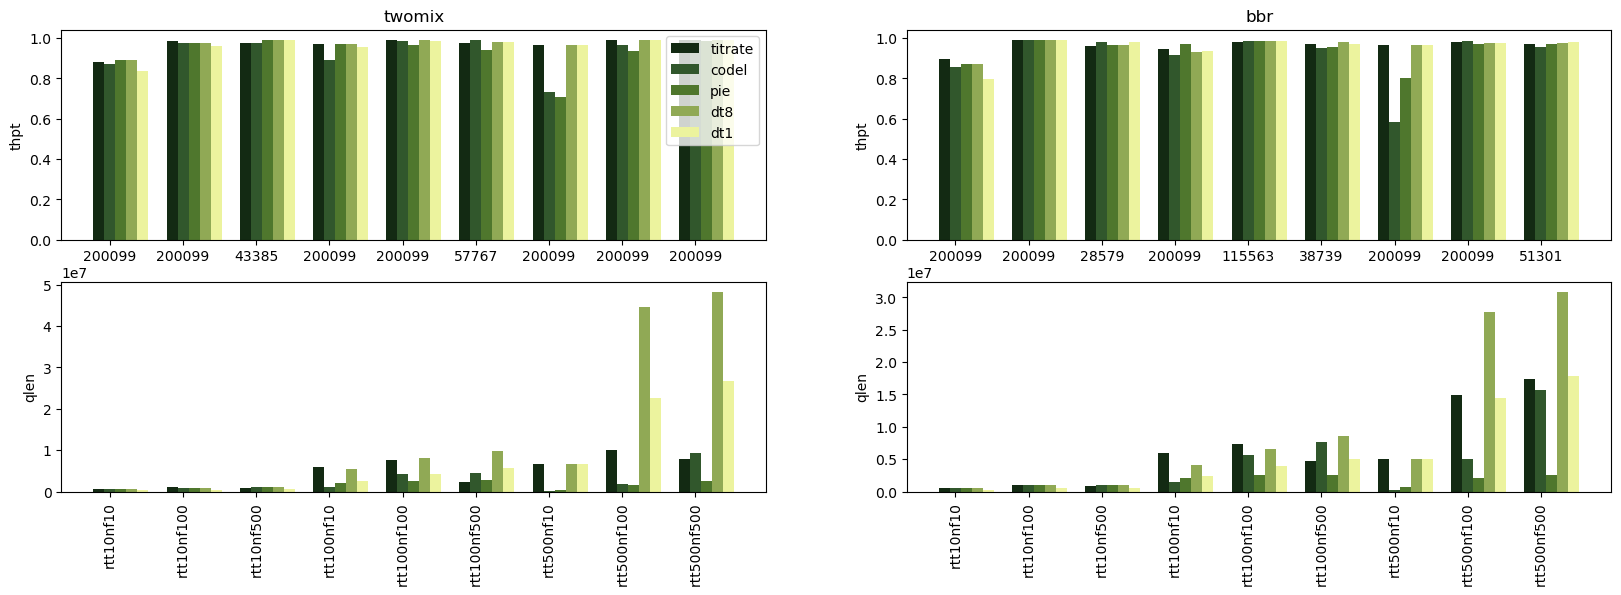

In [70]:
schemearr = ["titrate","codel","pie","dt8","dt1"]
# ylimarr = [0.8,0.4,0.8,0.8,0.6,0.8]
arrstart = 0 # 99000 # 0 # 95000
arrend = 500000 # 101000 # 200000 # 105000
# [arrstart:arrend]
nr = 2
nc = len(ccanamearr)
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

simlendict = dict()
for icca,ccaname in enumerate(ccanamearr):
    simlendict[icca] = list()

    thptdata = dict()
    qlendata = dict()
    for scheme in schemearr:

        thptdata[scheme] = list()
        qlendata[scheme] = list()
        for rtt in rttarr:
            for numflow in numflowarr:
                configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"

                datator = datadict[configname][scheme]
                if len(datator)==0: 
                    thptdata[scheme].append(0)
                    qlendata[scheme].append(0)
                    continue

                time = datator[0][arrstart:arrend]
                qlen = datator[1][arrstart:arrend]
                sent = datator[2][arrstart:arrend]
                thpt = datator[3][arrstart:arrend]
                drop = datator[4][arrstart:arrend]
                thres = datator[5][arrstart:arrend]
                
                if scheme=="titrate": simlendict[icca].append(len(time))

                thptdata[scheme].append(sum(thpt)/len(thpt))
                qlendata[scheme].append(sum(qlen)/len(qlen))

    num_groups = len(numflowarr)*len(rttarr)
    num_bars = len(schemearr)
    bar_width = 0.15

    x = np.arange(num_groups)

    colors = ['#132a13', '#31572c', '#4f772d', '#90a955', '#ecf39e']
    labels = schemearr

    for i,scheme in enumerate(schemearr):
        axs[0,icca].bar(x + i * bar_width, thptdata[scheme], width=bar_width, label=labels[i], color=colors[i])
        axs[1,icca].bar(x + i * bar_width, qlendata[scheme], width=bar_width, label=labels[i], color=colors[i])

    xticklabelarr = list()
    for rtt in rttarr:
        for numflow in numflowarr:
            xticklabelarr.append(f"rtt{rtt}nf{numflow}")
    axs[0,icca].set_xticks(x + bar_width)  # Center labels
    axs[0,icca].set_xticklabels(simlendict[icca])
    axs[0,icca].set_ylabel("thpt")
    axs[0,icca].set_title(f"{ccaname}")
    # axs[0,icca].set_ylim(ylimarr[icca],None)

    axs[1,icca].set_xticks(x + bar_width)  # Center labels
    axs[1,icca].set_xticklabels(xticklabelarr, rotation=90)
    axs[1,icca].set_ylabel("qlen")

axs[0,0].legend()

Text(0.5, 0.98, 'ccabbr_nf500_rtt500_cseed0')

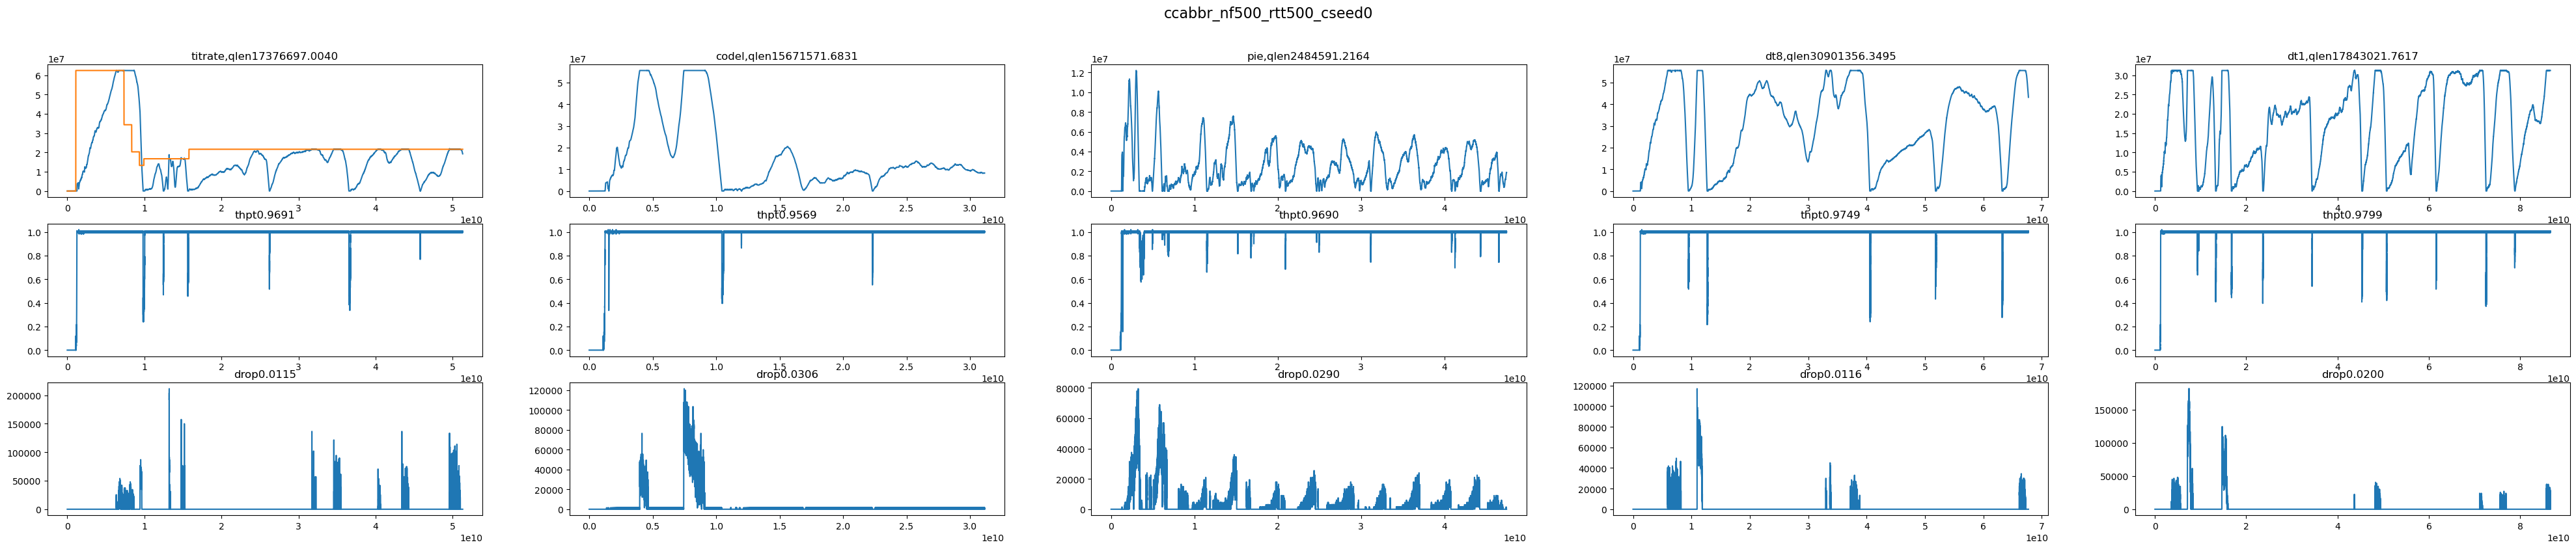

In [137]:
arrstart = 0
arrend = 500000 # 500000
ccaname="bbr"
rtt=500
numflow=500
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
nr = 3
nc = 5
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

schemearr = ["titrate","codel","pie","dt8","dt1"]
for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    if ischeme==0: axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen):.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

thpt test scripts

In [32]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["cubic","realmix","twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

cca="cubic"
numflow=10
rtt=100

In [25]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/thpt_test1.conf"
with open(file,'w') as f:
    configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
    conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
    
    BDP = int(rtt/1000 * midbw * 1000000/8)
    totalbuffer = BDP
    startbuffer = totalbuffer
    targetbw = int(totalbuffer//10)

    # Titrate
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="111"
    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT8
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=8
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # CoDel
    pawmode="fixed"
    qdisctype="CoDel"
    bufferalg="101"
    alpha=8
    confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # PIE
    pawmode="fixed"
    qdisctype="Pie"
    bufferalg="101"
    alpha=8
    confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT1
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=1
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [33]:
datadict = dict()
configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
datadict[configname] = dict()
datadict[configname]["titrate"] = dict()
datadict[configname]["dt8"] = dict()
datadict[configname]["codel"] = dict()
datadict[configname]["pie"] = dict()
datadict[configname]["dt1"] = dict()

BDP = int(rtt/1000 * midbw * 1000000/8)
totalbuffer = BDP
startbuffer = totalbuffer
targetbw = int(totalbuffer//10)

# Titrate
pawmode="pa"
qdisctype="Fifo"
bufferalg="111"
confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["titrate"] = statslist

# DT8
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=8
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt8"] = statslist

# CoDel
pawmode="fixed"
qdisctype="CoDel"
bufferalg="101"
alpha=8
confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["codel"] = statslist

# PIE
pawmode="fixed"
qdisctype="Pie"
bufferalg="101"
alpha=8
confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["pie"] = statslist

# DT1
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=1
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt1"] = statslist

/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf10_rtt100_cseed0_pa/12500000_111_0_204_12_12500000/2000_1250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf10_rtt100_cseed0_pa/12500000_101_8_204_1_12500000/2000_1250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf10_rtt100_cseed0_fixed/codel_5ms_100ms/12500000_101_8_204_1_12500000/2000_1250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf10_rtt100_cseed0_fixed/pie_20ms/12500000_101_8_204_1_12500000/2000_1250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf10_rtt100_cseed0_pa/12500000_101_1_204_1_12500000/2000_1250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr


Text(0.5, 0.98, 'ccacubic_nf10_rtt100_cseed0')

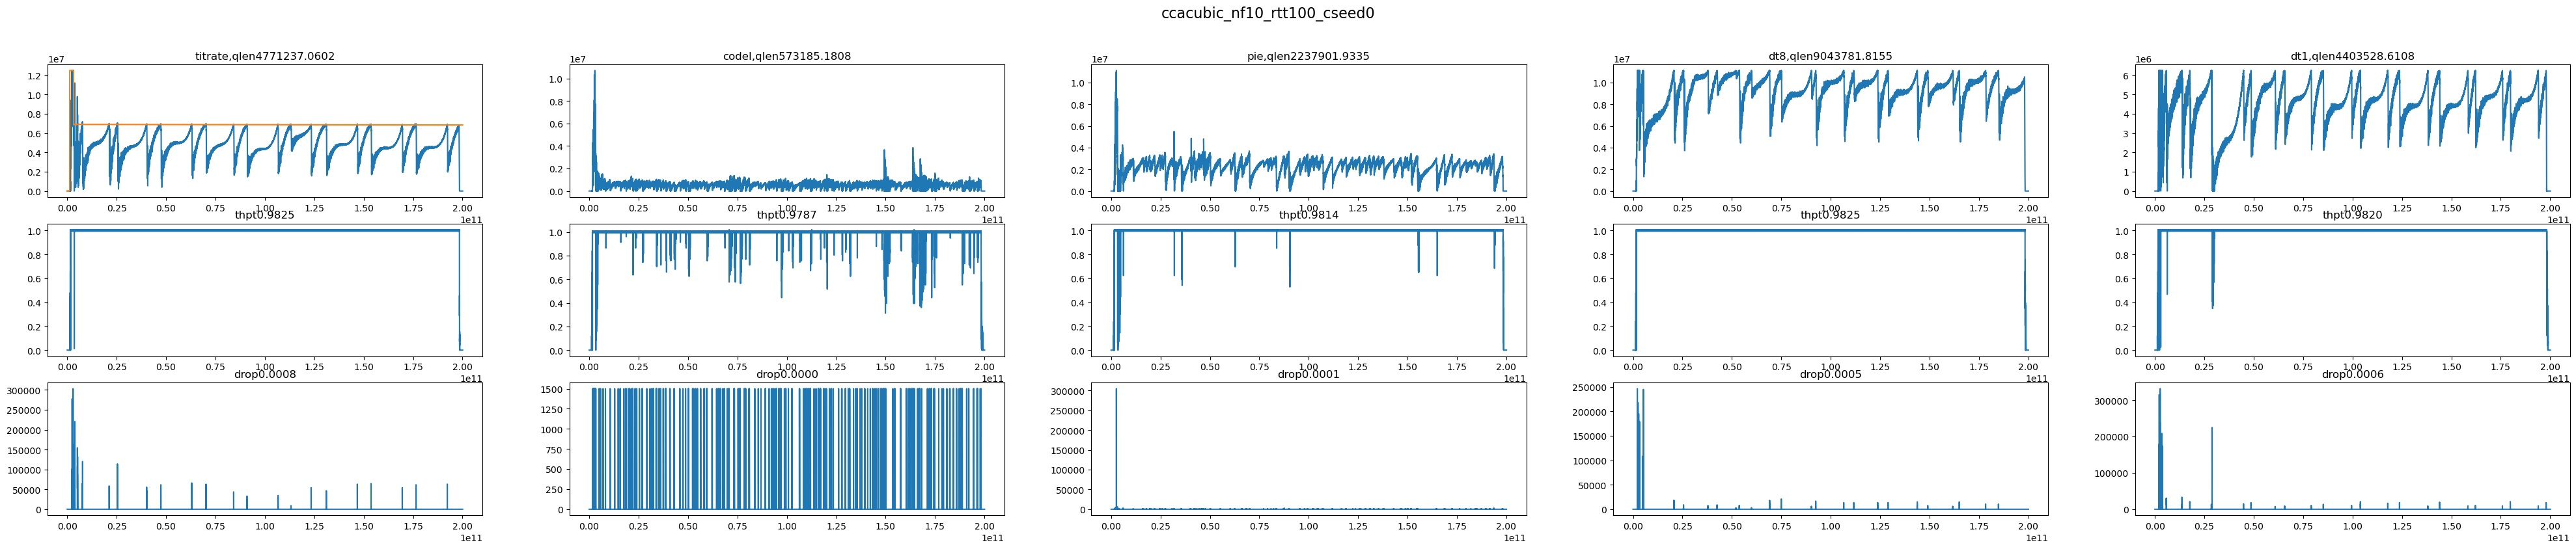

In [34]:
arrstart = 0 # 10000 # 0
arrend = 500000 # 500000
ccaname=cca
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
schemearr = ["titrate","codel","pie","dt8","dt1"]
nr = 3
nc = 5
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    if ischeme==0: axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen):.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

In [2]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["cubic","realmix","twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

cca="cubic"
numflow=500
rtt=500

In [27]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/thpt_test2.conf"
with open(file,'w') as f:
    configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
    conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
    
    BDP = int(rtt/1000 * midbw * 1000000/8)
    totalbuffer = BDP
    startbuffer = totalbuffer
    targetbw = int(totalbuffer//10)

    # Titrate
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="111"
    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT8
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=8
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # CoDel
    pawmode="fixed"
    qdisctype="CoDel"
    bufferalg="101"
    alpha=8
    confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # PIE
    pawmode="fixed"
    qdisctype="Pie"
    bufferalg="101"
    alpha=8
    confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT1
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=1
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [3]:
datadict = dict()
configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
datadict[configname] = dict()
datadict[configname]["titrate"] = dict()
datadict[configname]["dt8"] = dict()
datadict[configname]["codel"] = dict()
datadict[configname]["pie"] = dict()
datadict[configname]["dt1"] = dict()

BDP = int(rtt/1000 * midbw * 1000000/8)
totalbuffer = BDP
startbuffer = totalbuffer
targetbw = int(totalbuffer//10)

# Titrate
pawmode="pa"
qdisctype="Fifo"
bufferalg="111"
confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["titrate"] = statslist

# DT8
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=8
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt8"] = statslist

# CoDel
pawmode="fixed"
qdisctype="CoDel"
bufferalg="101"
alpha=8
confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["codel"] = statslist

# PIE
pawmode="fixed"
qdisctype="Pie"
bufferalg="101"
alpha=8
confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["pie"] = statslist

# DT1
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=1
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt1"] = statslist

/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf500_rtt500_cseed0_pa/62500000_111_0_204_12_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf500_rtt500_cseed0_pa/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf500_rtt500_cseed0_fixed/codel_5ms_100ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf500_rtt500_cseed0_fixed/pie_20ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccacubic_nf500_rtt500_cseed0_pa/62500000_101_1_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
***Short logs: ccacubic_nf500_rtt500_cseed0, totalbuffer=62500000, srcbwstr=2000, 35100


Text(0.5, 0.98, 'ccacubic_nf500_rtt500_cseed0')

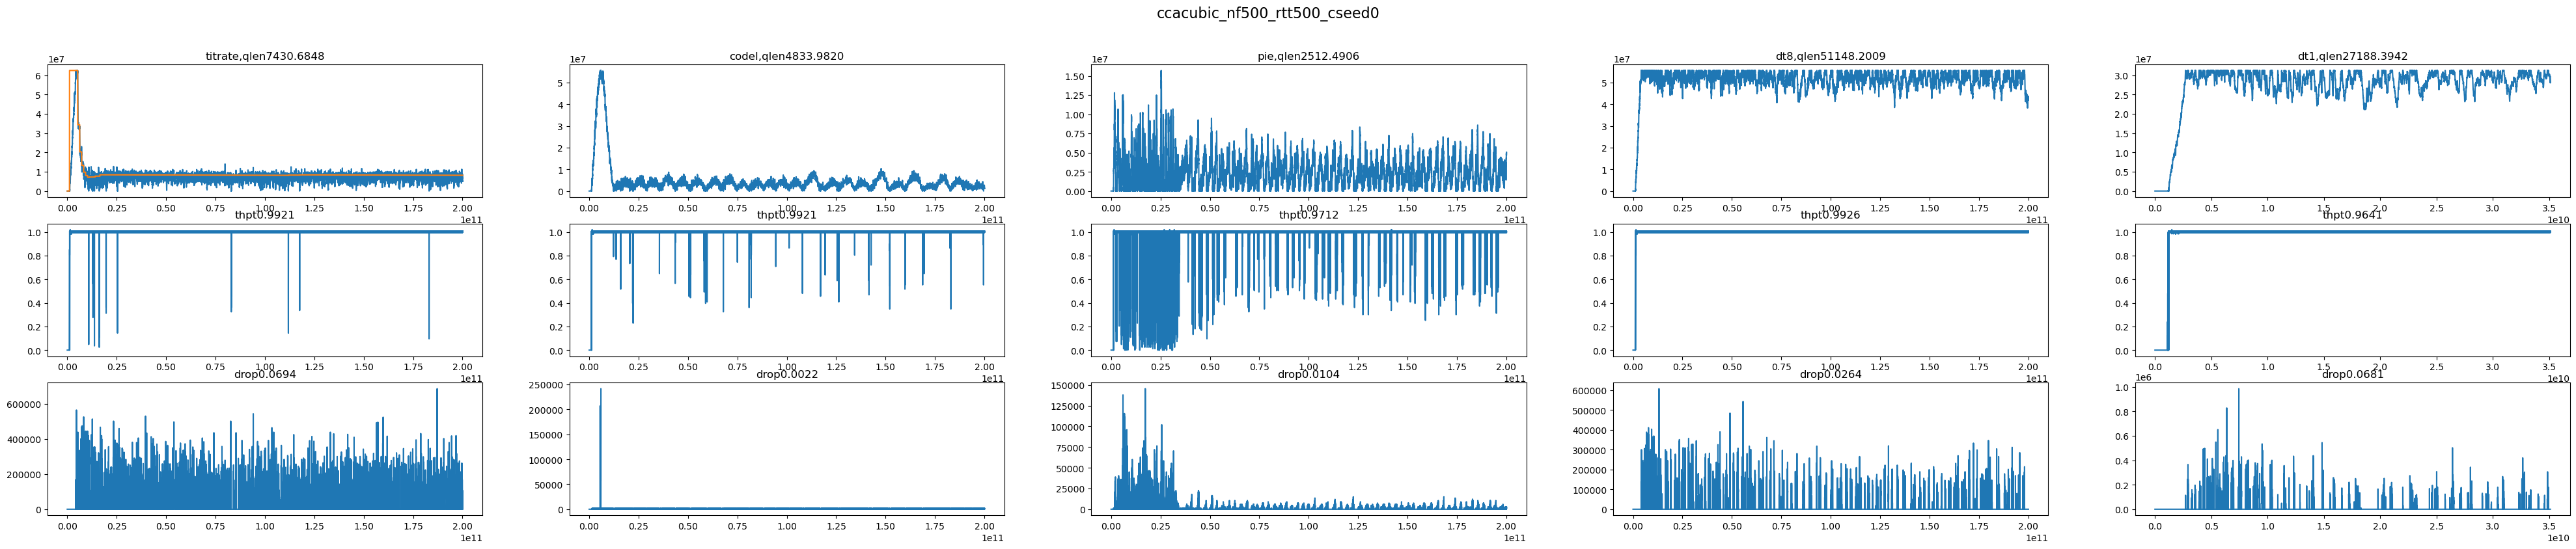

In [5]:
arrstart = 0 # 10000 # 0
arrend = 500000 # 500000
ccaname=cca
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
schemearr = ["titrate","codel","pie","dt8","dt1"]
nr = 3
nc = 5
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    if ischeme==0: axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen)/1000:.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

In [20]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["cubic","realmix","twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

cca="realmix"
numflow=100
rtt=10

In [29]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/thpt_test3.conf"
with open(file,'w') as f:
    configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
    conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
    
    BDP = int(rtt/1000 * midbw * 1000000/8)
    totalbuffer = BDP
    startbuffer = totalbuffer
    targetbw = int(totalbuffer//10)

    # Titrate
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="111"
    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT8
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=8
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # CoDel
    pawmode="fixed"
    qdisctype="CoDel"
    bufferalg="101"
    alpha=8
    confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # PIE
    pawmode="fixed"
    qdisctype="Pie"
    bufferalg="101"
    alpha=8
    confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT1
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=1
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [21]:
datadict = dict()
configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
datadict[configname] = dict()
datadict[configname]["titrate"] = dict()
datadict[configname]["dt8"] = dict()
datadict[configname]["codel"] = dict()
datadict[configname]["pie"] = dict()
datadict[configname]["dt1"] = dict()

BDP = int(rtt/1000 * midbw * 1000000/8)
totalbuffer = BDP
startbuffer = totalbuffer
targetbw = int(totalbuffer//10)

# Titrate
pawmode="pa"
qdisctype="Fifo"
bufferalg="111"
confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["titrate"] = statslist

# DT8
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=8
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt8"] = statslist

# CoDel
pawmode="fixed"
qdisctype="CoDel"
bufferalg="101"
alpha=8
confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["codel"] = statslist

# PIE
pawmode="fixed"
qdisctype="Pie"
bufferalg="101"
alpha=8
confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["pie"] = statslist

# DT1
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=1
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt1"] = statslist

/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt10_cseed0_pa/1250000_111_0_204_12_1250000/2000_125000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt10_cseed0_pa/1250000_101_8_204_1_1250000/2000_125000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt10_cseed0_fixed/codel_5ms_100ms/1250000_101_8_204_1_1250000/2000_125000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt10_cseed0_fixed/pie_20ms/1250000_101_8_204_1_1250000/2000_125000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt10_cseed0_pa/1250000_101_1_204_1_1250000/2000_125000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr


Text(0.5, 0.98, 'ccarealmix_nf100_rtt10_cseed0')

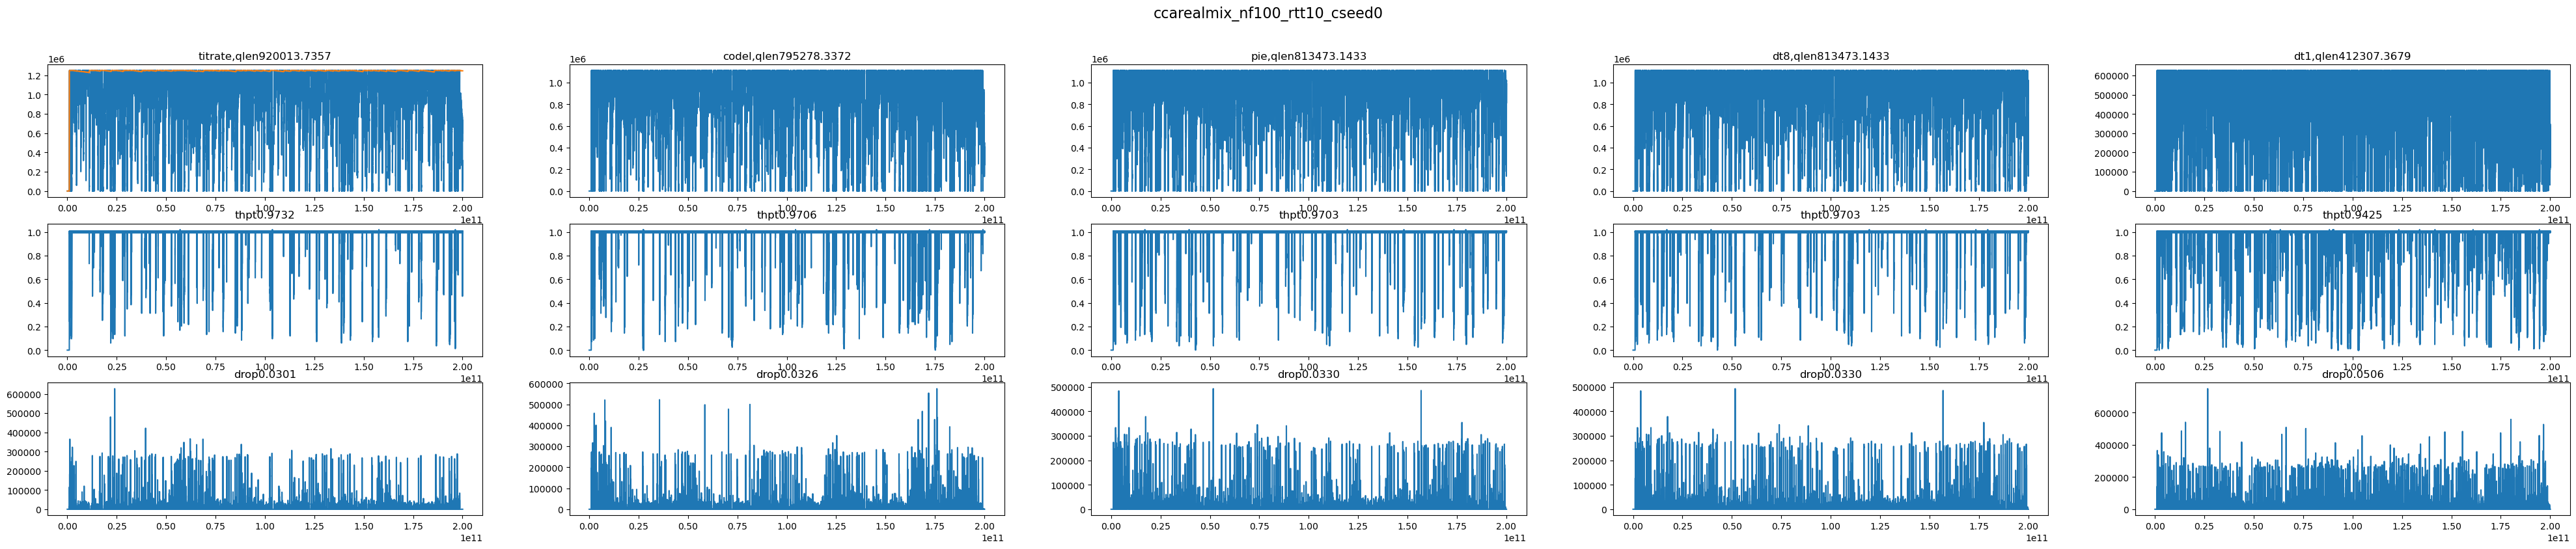

In [22]:
arrstart = 0 # 10000 # 0
arrend = 500000 # 500000
ccaname=cca
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
schemearr = ["titrate","codel","pie","dt8","dt1"]
nr = 3
nc = 5
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    if ischeme==0: axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen):.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

In [23]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["cubic","realmix","twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

cca="realmix"
numflow=100
rtt=500

In [31]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/thpt_test4.conf"
with open(file,'w') as f:
    configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
    conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
    
    BDP = int(rtt/1000 * midbw * 1000000/8)
    totalbuffer = BDP
    startbuffer = totalbuffer
    targetbw = int(totalbuffer//10)

    # Titrate
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="111"
    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT8
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=8
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # CoDel
    pawmode="fixed"
    qdisctype="CoDel"
    bufferalg="101"
    alpha=8
    confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # PIE
    pawmode="fixed"
    qdisctype="Pie"
    bufferalg="101"
    alpha=8
    confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT1
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=1
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [24]:
datadict = dict()
configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
datadict[configname] = dict()
datadict[configname]["titrate"] = dict()
datadict[configname]["dt8"] = dict()
datadict[configname]["codel"] = dict()
datadict[configname]["pie"] = dict()
datadict[configname]["dt1"] = dict()

BDP = int(rtt/1000 * midbw * 1000000/8)
totalbuffer = BDP
startbuffer = totalbuffer
targetbw = int(totalbuffer//10)

# Titrate
pawmode="pa"
qdisctype="Fifo"
bufferalg="111"
confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["titrate"] = statslist

# DT8
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=8
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt8"] = statslist

# CoDel
pawmode="fixed"
qdisctype="CoDel"
bufferalg="101"
alpha=8
confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["codel"] = statslist

# PIE
pawmode="fixed"
qdisctype="Pie"
bufferalg="101"
alpha=8
confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["pie"] = statslist

# DT1
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=1
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt1"] = statslist

/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt500_cseed0_pa/62500000_111_0_204_12_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt500_cseed0_pa/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt500_cseed0_fixed/codel_5ms_100ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt500_cseed0_fixed/pie_20ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf100_rtt500_cseed0_pa/62500000_101_1_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr


Text(0.5, 0.98, 'ccarealmix_nf100_rtt500_cseed0')

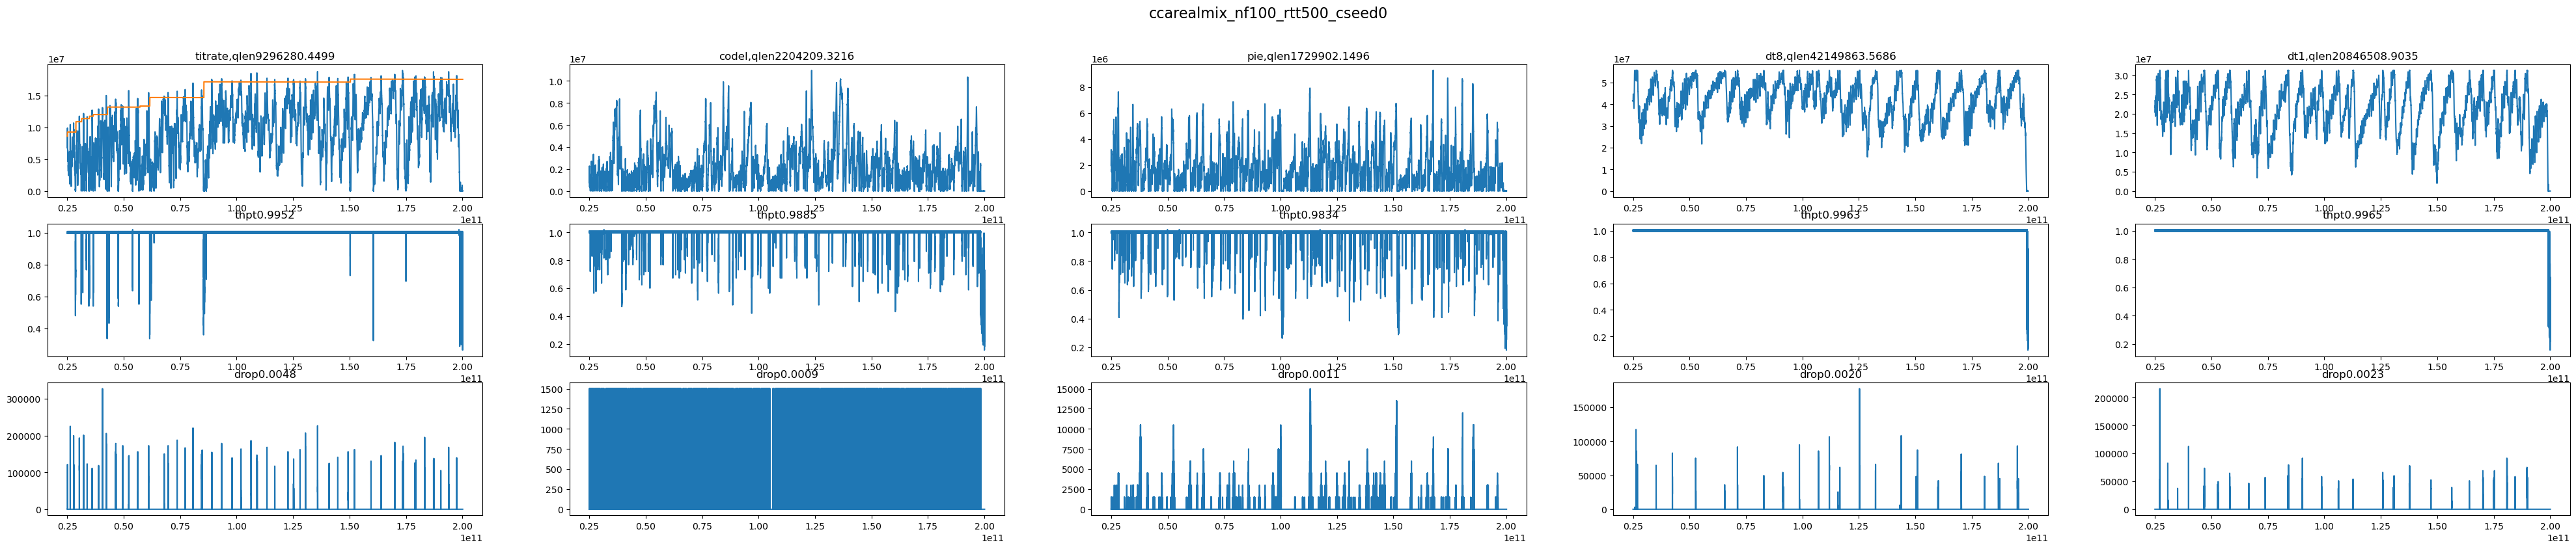

In [26]:
arrstart = 25000 # 10000 # 0
arrend = 500000 # 500000
ccaname=cca
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
schemearr = ["titrate","codel","pie","dt8","dt1"]
nr = 3
nc = 5
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    if ischeme==0: axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen):.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

In [6]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["cubic","realmix","twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

cca="realmix"
numflow=10
rtt=500

In [36]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/thpt_test5.conf"
with open(file,'w') as f:
    configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
    conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
    
    BDP = int(rtt/1000 * midbw * 1000000/8)
    totalbuffer = BDP
    startbuffer = totalbuffer
    targetbw = int(totalbuffer//10)

    # Titrate
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="111"
    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT8
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=8
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # CoDel
    pawmode="fixed"
    qdisctype="CoDel"
    bufferalg="101"
    alpha=8
    confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # PIE
    pawmode="fixed"
    qdisctype="Pie"
    bufferalg="101"
    alpha=8
    confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
    logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

    # DT1
    pawmode="pa"
    qdisctype="Fifo"
    bufferalg="101"
    alpha=1
    confstr = f"--alphaString={alpha} --targetBW={targetbw}"
    logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
    f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [7]:
datadict = dict()
configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
datadict[configname] = dict()
datadict[configname]["titrate"] = dict()
datadict[configname]["dt8"] = dict()
datadict[configname]["codel"] = dict()
datadict[configname]["pie"] = dict()
datadict[configname]["dt1"] = dict()

BDP = int(rtt/1000 * midbw * 1000000/8)
totalbuffer = BDP
startbuffer = totalbuffer
targetbw = int(totalbuffer//10)

# Titrate
pawmode="pa"
qdisctype="Fifo"
bufferalg="111"
confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["titrate"] = statslist

# DT8
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=8
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt8"] = statslist

# CoDel
pawmode="fixed"
qdisctype="CoDel"
bufferalg="101"
alpha=8
confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["codel"] = statslist

# PIE
pawmode="fixed"
qdisctype="Pie"
bufferalg="101"
alpha=8
confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["pie"] = statslist

# DT1
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=1
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt1"] = statslist

/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt500_cseed0_pa/62500000_111_0_204_12_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt500_cseed0_pa/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt500_cseed0_fixed/codel_5ms_100ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt500_cseed0_fixed/pie_20ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt500_cseed0_pa/62500000_101_1_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr


Text(0.5, 0.98, 'ccarealmix_nf10_rtt500_cseed0')

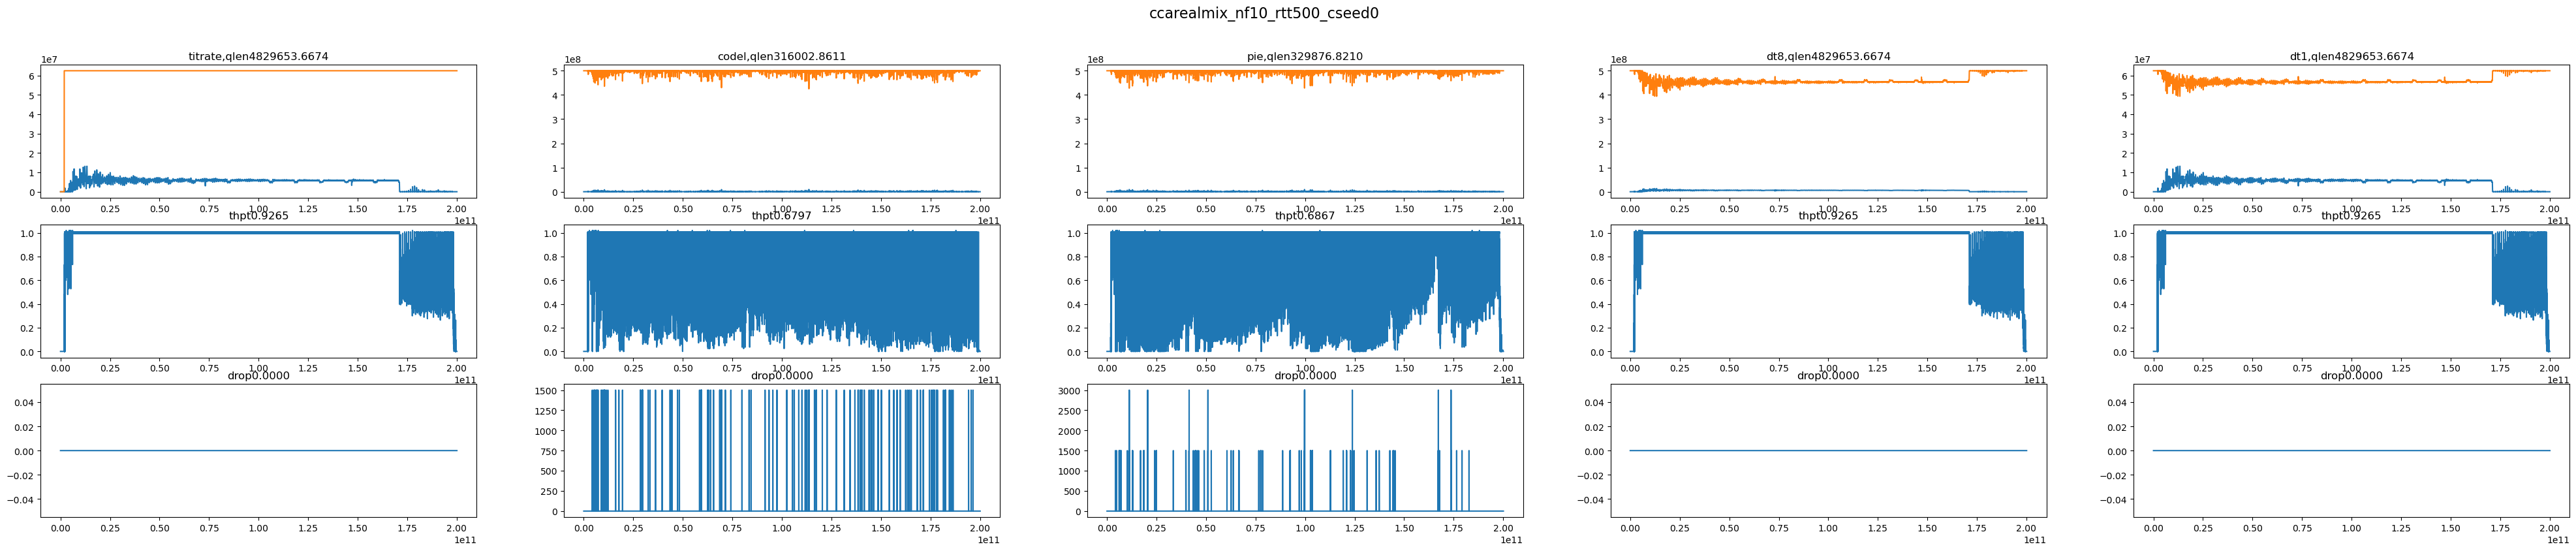

In [8]:
arrstart = 0 # 10000 # 0
arrend = 500000 # 500000
ccaname=cca
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
schemearr = ["titrate","codel","pie","dt8","dt1"]
nr = 3
nc = 5
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen):.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

In [9]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["cubic","realmix","twomix","bbr"]
numflowarr=[10,100,500]
rttarr=[10,100,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

cca="realmix"
numflow=10
rtt=10

In [10]:
datadict = dict()
configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
datadict[configname] = dict()
datadict[configname]["titrate"] = dict()
datadict[configname]["dt8"] = dict()
datadict[configname]["codel"] = dict()
datadict[configname]["pie"] = dict()
datadict[configname]["dt1"] = dict()

# BDP = int(rtt/1000 * midbw * 1000000/8)
BDP = 62500000
totalbuffer = BDP
startbuffer = totalbuffer
targetbw = int(totalbuffer//10)

# Titrate
pawmode="pa"
qdisctype="Fifo"
bufferalg="111"
confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["titrate"] = statslist

# DT8
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=8
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt8"] = statslist

# CoDel
pawmode="fixed"
qdisctype="CoDel"
bufferalg="101"
alpha=8
confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["codel"] = statslist

# PIE
pawmode="fixed"
qdisctype="Pie"
bufferalg="101"
alpha=8
confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["pie"] = statslist

# DT1
pawmode="pa"
qdisctype="Fifo"
bufferalg="101"
alpha=1
confstr = f"--alphaString={alpha} --targetBW={targetbw}"
logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
if not os.path.exists(fdir+"tor.tr"):
    print(f"***Warning: {fdir}tor.tr not found")
else:
    print(f"{fdir}tor.tr")
    statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
    if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
    datadict[configname]["dt1"] = statslist

/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt10_cseed0_pa/62500000_111_0_204_12_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt10_cseed0_pa/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr
***Warning: /u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt10_cseed0_fixed/codel_5ms_100ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr not found
***Warning: /u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt10_cseed0_fixed/pie_20ms/62500000_101_8_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr not found
/u/az6922/Buffer/ns-3.34/logs/ccarealmix_nf10_rtt10_cseed0_pa/62500000_101_1_204_1_62500000/2000_6250000/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_10000/1/tor.tr


Text(0.5, 0.98, 'ccarealmix_nf10_rtt10_cseed0')

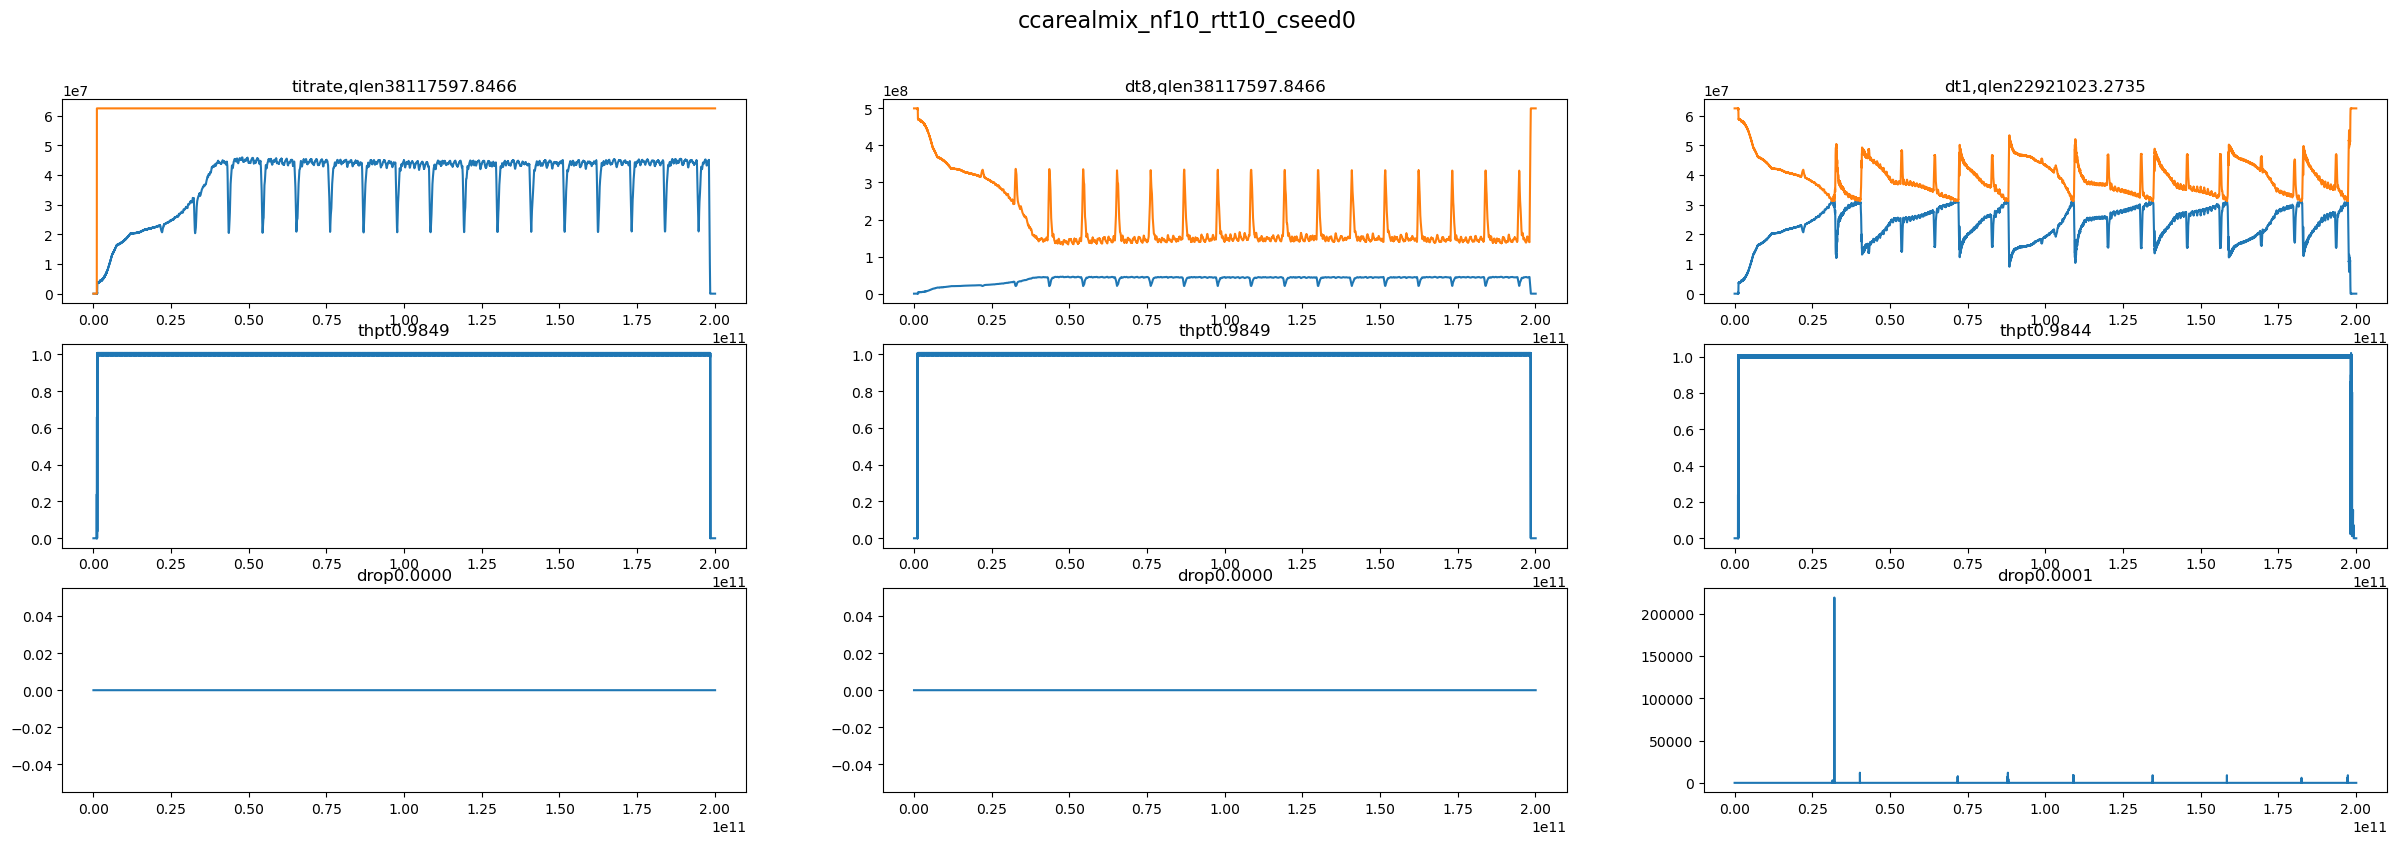

In [11]:
arrstart = 0 # 10000 # 0
arrend = 500000 # 500000
ccaname=cca
configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
schemearr = ["titrate","dt8","dt1"]
nr = 3
nc = 3
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

for ischeme,scheme in enumerate(schemearr):
    datator = datadict[configname][scheme]
    time = datator[0][arrstart:arrend]
    qlen = datator[1][arrstart:arrend]
    sent = datator[2][arrstart:arrend]
    thpt = datator[3][arrstart:arrend]
    drop = datator[4][arrstart:arrend]
    thres = datator[5][arrstart:arrend]
    axs[0,ischeme].plot(time,qlen)
    axs[0,ischeme].plot(time,thres)
    axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen):.4f}")
    axs[1,ischeme].plot(time,thpt)
    axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
    axs[2,ischeme].plot(time,drop)
    axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
fig.suptitle(configname, fontsize=16)

try most malicious cases

In [2]:
ns3seed = 1
confseed = 0
numsinks=1
seed = 1
smoothwindow = 100
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
# totalbuffer = 5000000
sim=200
mi=500
# targetbw = 0
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
# startbuffer = totalbuffer//2
smooththreshold = 10000
ccanamearr=["realmix","cubic"]
numflowarr=[10,1000]
rttarr=[50,500]
mrnq=12

twomixdict = {4:6,5:4}
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}

In [4]:
for rtt in rttarr:
    for numflow in numflowarr:
        ratearr = generate_srclinkratearr(rtt,numflow,rseed=confseed)
        for ccaname in ccanamearr:
            conffile = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/configurations/cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}.conf"

            if ccaname=="cubic":
                myccaarr = [4]
            elif ccaname=="bbr":
                myccaarr = [5]
            elif ccaname=="twomix":
                myccaarr = list()
                for cca,count in twomixdict.items():
                    for i in range(count):
                        myccaarr.append(cca)
            elif ccaname=="realmix":
                myccaarr = list()
                for cca,count in realmixdict.items():
                    for i in range(count):
                        myccaarr.append(cca)
                
            with open(conffile,'w') as f:
                f.write(f"{numflow}\n")
                for inf,nf in enumerate(range(numflow)):
                    cca = myccaarr[random.randint(0,len(myccaarr)-1)]
                    f.write(f"0\t{inf}\tLong\t100001\t0\t{cca}\t1\t{ratearr[inf]}\t1\n")

In [7]:
file = f"{homedir}Buffer/experiments/nsdi26sp/design_thpt/bad_thpt.conf"
with open(file,'w') as f:
    for cca in ccanamearr:
        for numflow in numflowarr:
            for rtt in rttarr:
                if numflow==10 and rtt==50: continue
                configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
                conffile = f"../experiments/nsdi26sp/design_thpt/configurations/{configname}.conf"
                
                BDP = int(rtt/1000 * midbw * 1000000/8)
                totalbuffer = 2*BDP
                startbuffer = totalbuffer
                targetbw = int(totalbuffer//10)

                # Titrate
                pawmode="pa"
                qdisctype="Fifo"
                bufferalg="111"
                confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
                logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # DT8
                # pawmode="pa"
                # qdisctype="Fifo"
                # bufferalg="101"
                # alpha=8
                # confstr = f"--alphaString={alpha} --targetBW={targetbw}"
                # logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # CoDel
                pawmode="fixed"
                qdisctype="CoDel"
                bufferalg="101"
                alpha=8
                confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
                logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # PIE
                pawmode="fixed"
                qdisctype="Pie"
                bufferalg="101"
                alpha=8
                confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
                logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # Static
                # if cca=="cubic" or cca=="bbr":
                #     pawmode="fixed"
                #     qdisctype="Fifo"
                #     bufferalg="111"

                #     BDP = int(rtt/1000 * midbw * 1000000/8)
                #     if cca=="cubic":
                #         startbuffer = int(3/7*BDP)
                #     elif cca=="bbr":
                #         startbuffer = int(1/4*BDP)

                #     confstr = f"--targetBW={targetbw}"
                #     logstr = f"{totalbuffer}_{bufferalg}_0_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                #     f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                # DT1
                pawmode="pa"
                qdisctype="Fifo"
                bufferalg="101"
                alpha=1
                confstr = f"--alphaString={alpha} --targetBW={targetbw}"
                logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")


In [ ]:
datadict = dict()
for cca in ccanamearr:
    for numflow in numflowarr:
        for rtt in rttarr:
            if numflow==10 and rtt==50: continue
            configname = f"cca{cca}_nf{numflow}_rtt{rtt}_cseed{confseed}"
            datadict[configname] = dict()
            datadict[configname]["titrate"] = dict()
            datadict[configname]["dt8"] = dict()
            datadict[configname]["codel"] = dict()
            datadict[configname]["pie"] = dict()
            datadict[configname]["dt1"] = dict()

            BDP = int(rtt/1000 * midbw * 1000000/8)
            totalbuffer = 2*BDP
            startbuffer = totalbuffer
            targetbw = int(totalbuffer//10)

            # Titrate
            pawmode="pa"
            qdisctype="Fifo"
            bufferalg="111"
            confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
            logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["titrate"] = statslist

            # DT8
            # pawmode="pa"
            # qdisctype="Fifo"
            # bufferalg="101"
            # alpha=8
            # confstr = f"--alphaString={alpha} --targetBW={targetbw}"
            # logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            # fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            # if not os.path.exists(fdir+"tor.tr"):
            #     print(f"***Warning: {fdir}tor.tr not found")
            # else:
            #     print(f"{fdir}tor.tr")
            #     statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
            #     if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
            #     datadict[configname]["dt8"] = statslist

            # CoDel
            pawmode="fixed"
            qdisctype="CoDel"
            bufferalg="101"
            alpha=8
            confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
            logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["codel"] = statslist

            # PIE
            pawmode="fixed"
            qdisctype="Pie"
            bufferalg="101"
            alpha=8
            confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
            logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["pie"] = statslist
            
            # DT1
            pawmode="pa"
            qdisctype="Fifo"
            bufferalg="101"
            alpha=1
            confstr = f"--alphaString={alpha} --targetBW={targetbw}"
            logstr = f"{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
            fdir = f"{homedir}Buffer/ns-3.34/logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
            if not os.path.exists(fdir+"tor.tr"):
                print(f"***Warning: {fdir}tor.tr not found")
            else:
                print(f"{fdir}tor.tr")
                statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                datadict[configname]["dt1"] = statslist

In [12]:
with open(f'{homedir}/Buffer/experiments/nsdi26sp/design_thpt/bad_thpt_incomplete.pickle', 'wb') as handle:
    pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(f'{homedir}/Buffer/experiments/nsdi26sp/design_thpt/bad_thpt.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

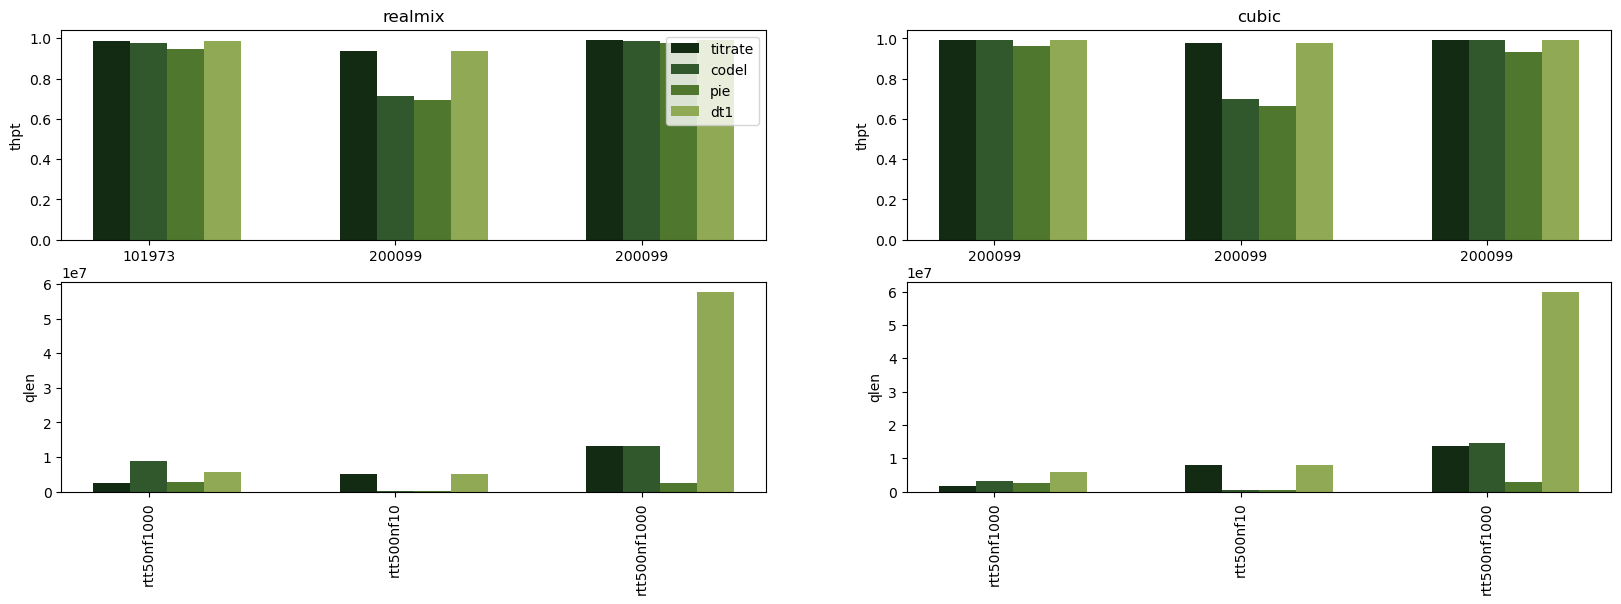

In [7]:
schemearr = ["titrate","codel","pie","dt1"]
# ylimarr = [0.8,0.4,0.8,0.8,0.6,0.8]
arrstart = 0 # 99000 # 0 # 95000
arrend = 500000 # 101000 # 200000 # 105000
# [arrstart:arrend]
nr = 2
nc = len(ccanamearr)
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

simlendict = dict()
for icca,ccaname in enumerate(ccanamearr):
    simlendict[icca] = list()

    thptdata = dict()
    qlendata = dict()
    for scheme in schemearr:

        thptdata[scheme] = list()
        qlendata[scheme] = list()
        for rtt in rttarr:
            for numflow in numflowarr:
                if numflow==10 and rtt==50: continue
                configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"

                datator = datadict[configname][scheme]
                if len(datator)==0: 
                    thptdata[scheme].append(0)
                    qlendata[scheme].append(0)
                    continue

                time = datator[0][arrstart:arrend]
                qlen = datator[1][arrstart:arrend]
                sent = datator[2][arrstart:arrend]
                thpt = datator[3][arrstart:arrend]
                drop = datator[4][arrstart:arrend]
                thres = datator[5][arrstart:arrend]
                
                if scheme=="titrate": simlendict[icca].append(len(time))

                thptdata[scheme].append(sum(thpt)/len(thpt))
                qlendata[scheme].append(sum(qlen)/len(qlen))

    num_groups = len(numflowarr)*len(rttarr)-1
    num_bars = len(schemearr)
    bar_width = 0.15

    x = np.arange(num_groups)

    colors = ['#132a13', '#31572c', '#4f772d', '#90a955', '#ecf39e']
    labels = schemearr

    for i,scheme in enumerate(schemearr):
        axs[0,icca].bar(x + i * bar_width, thptdata[scheme], width=bar_width, label=labels[i], color=colors[i])
        axs[1,icca].bar(x + i * bar_width, qlendata[scheme], width=bar_width, label=labels[i], color=colors[i])

    xticklabelarr = list()
    for rtt in rttarr:
        for numflow in numflowarr:
            if numflow==10 and rtt==50: continue
            xticklabelarr.append(f"rtt{rtt}nf{numflow}")
    axs[0,icca].set_xticks(x + bar_width)  # Center labels
    axs[0,icca].set_xticklabels(simlendict[icca])
    axs[0,icca].set_ylabel("thpt")
    axs[0,icca].set_title(f"{ccaname}")
    # axs[0,icca].set_ylim(ylimarr[icca],None)

    axs[1,icca].set_xticks(x + bar_width)  # Center labels
    axs[1,icca].set_xticklabels(xticklabelarr, rotation=90)
    axs[1,icca].set_ylabel("qlen")

axs[0,0].legend()

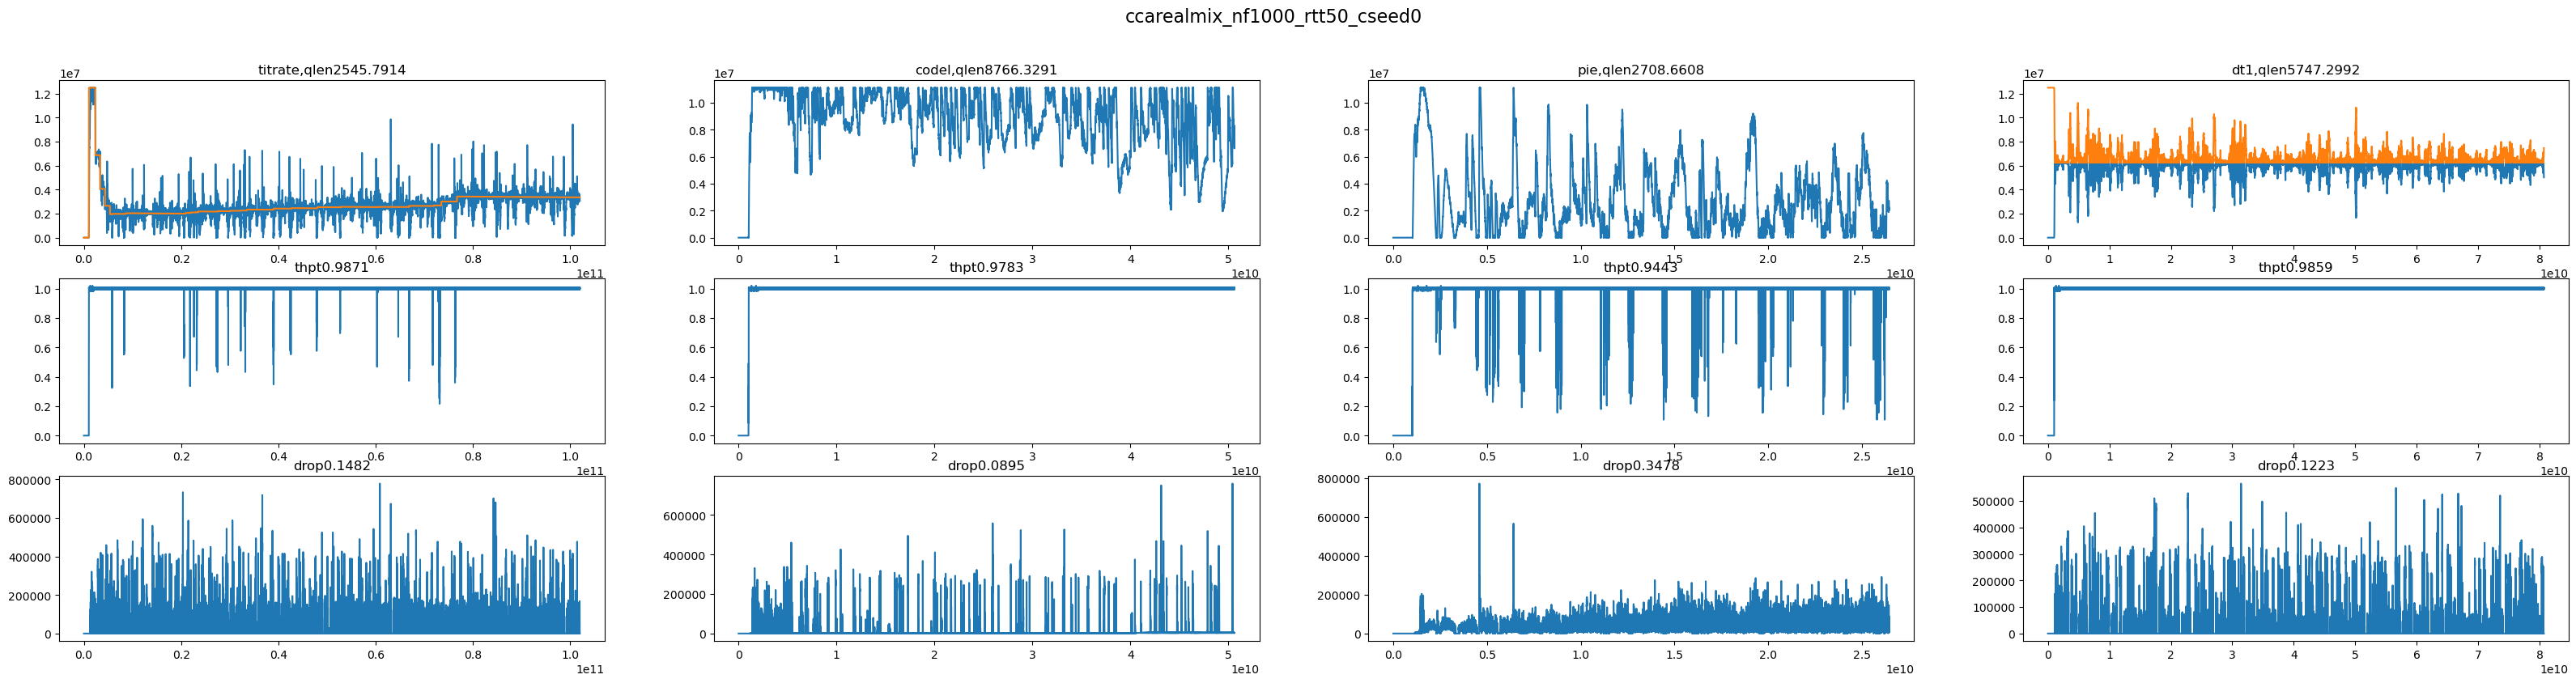

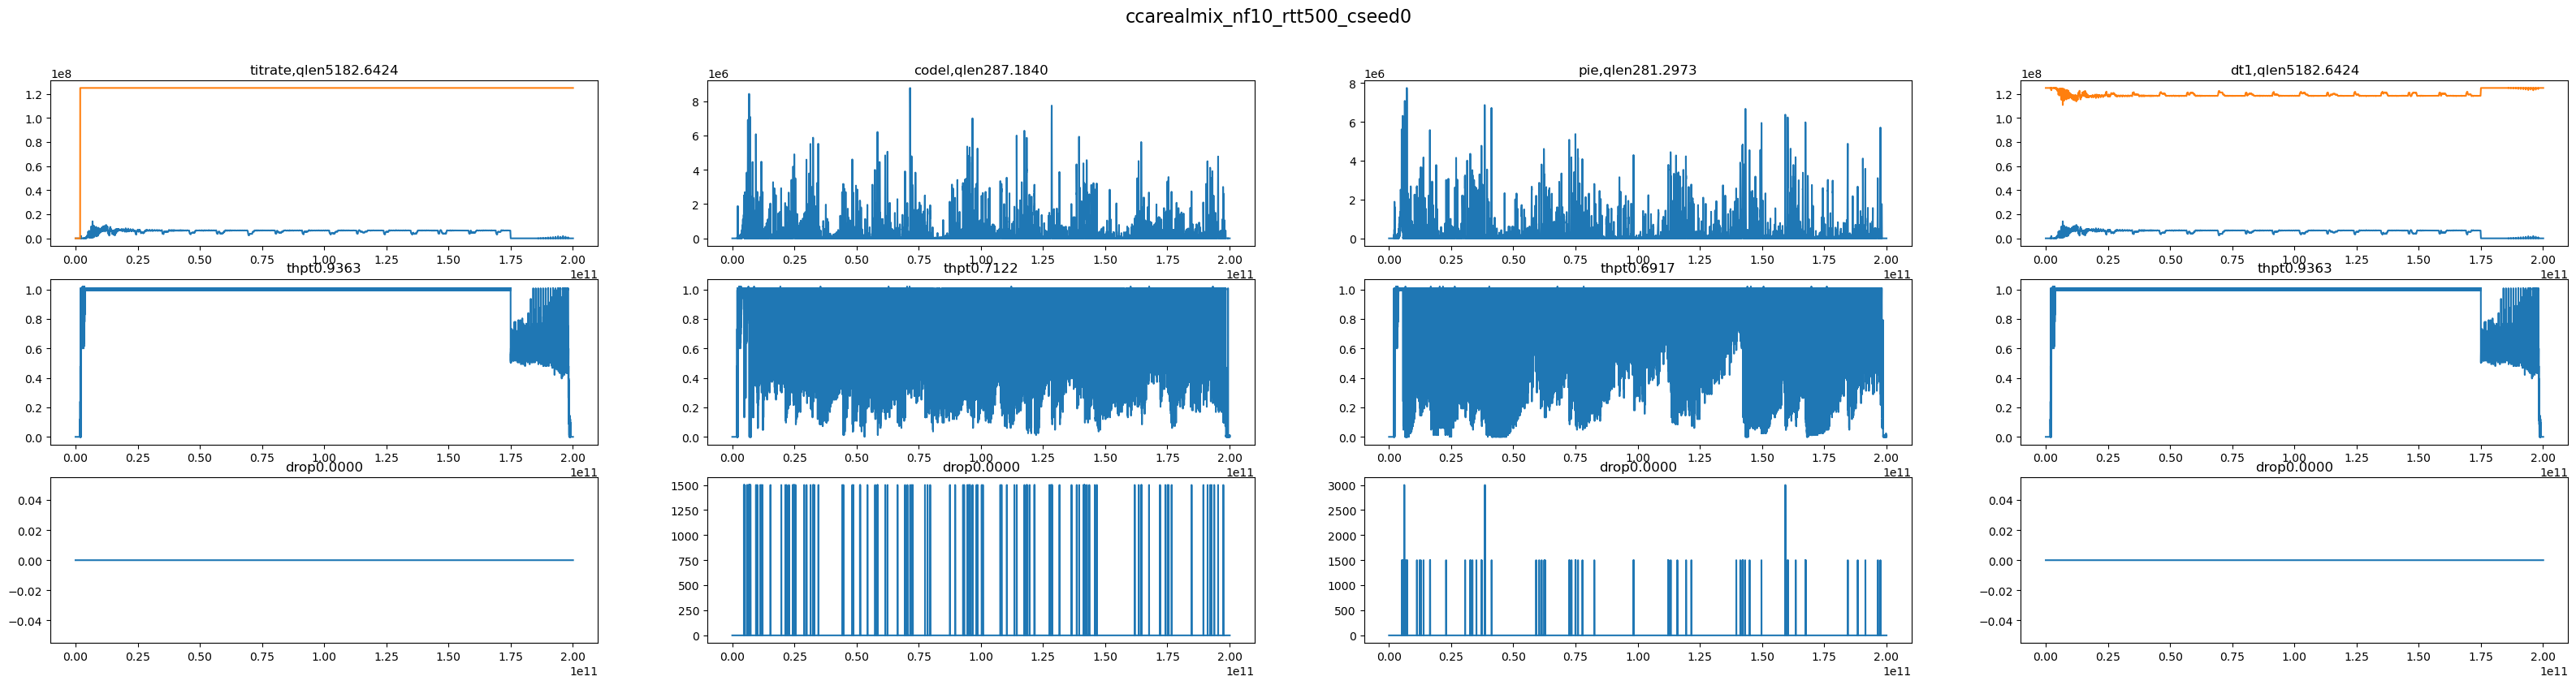

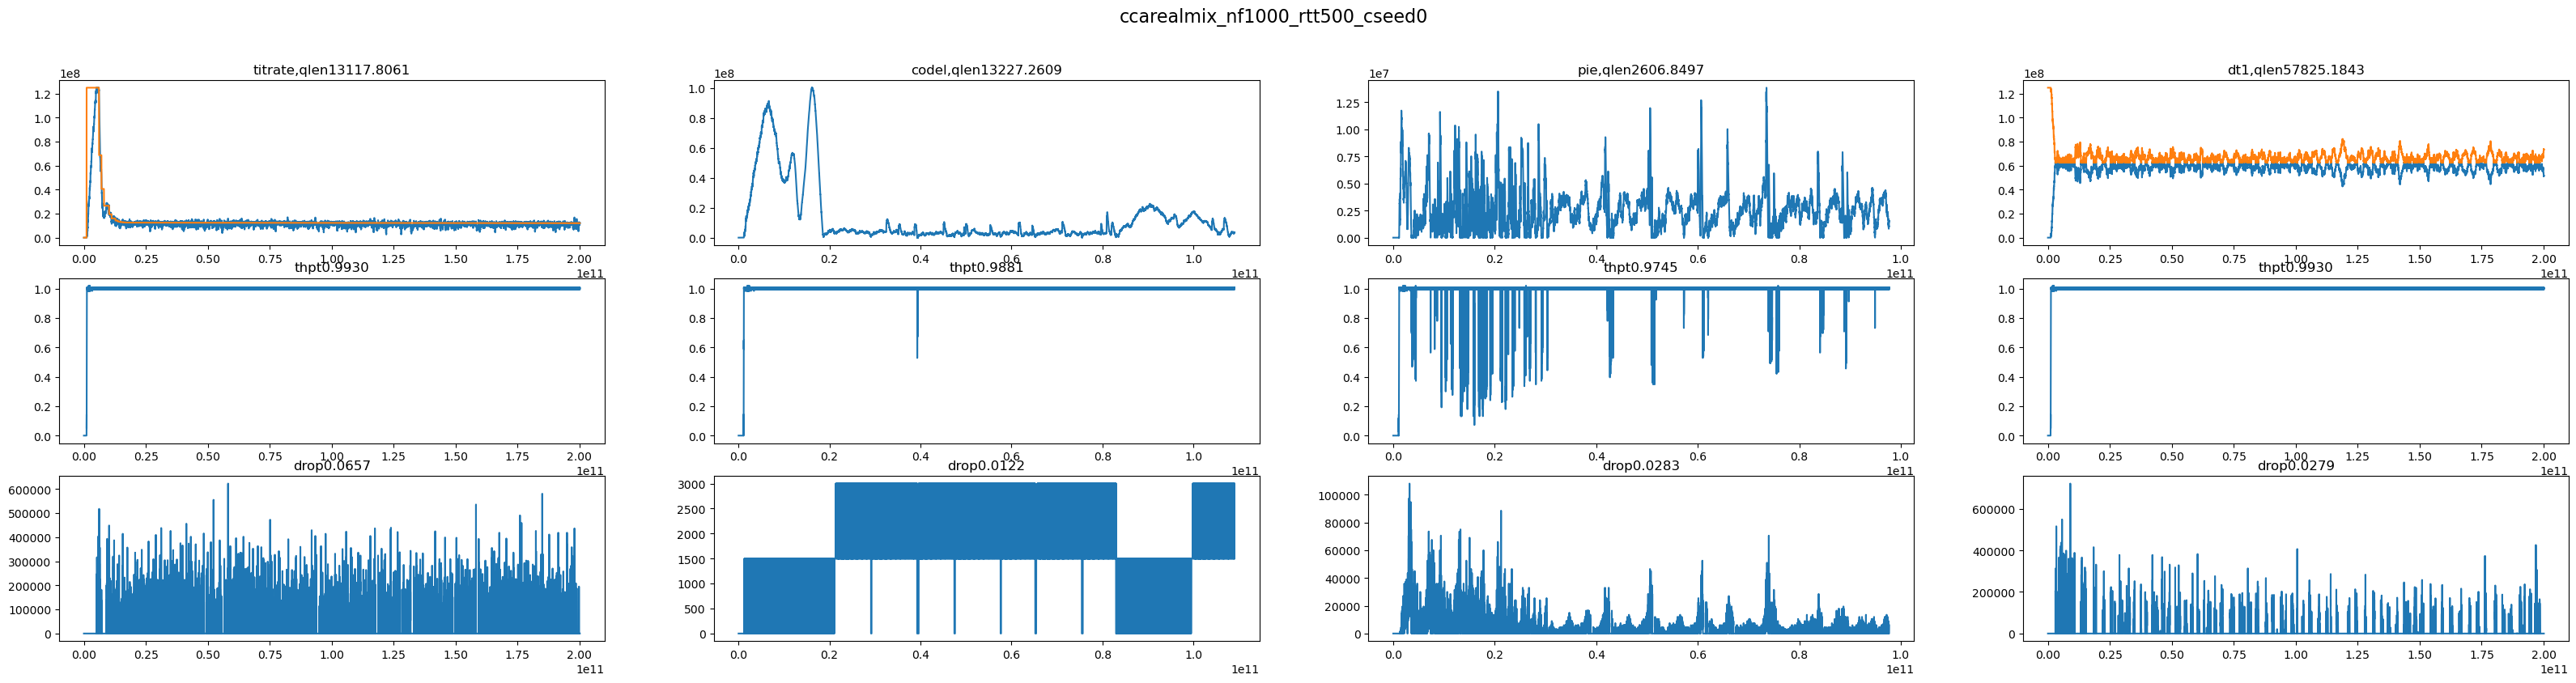

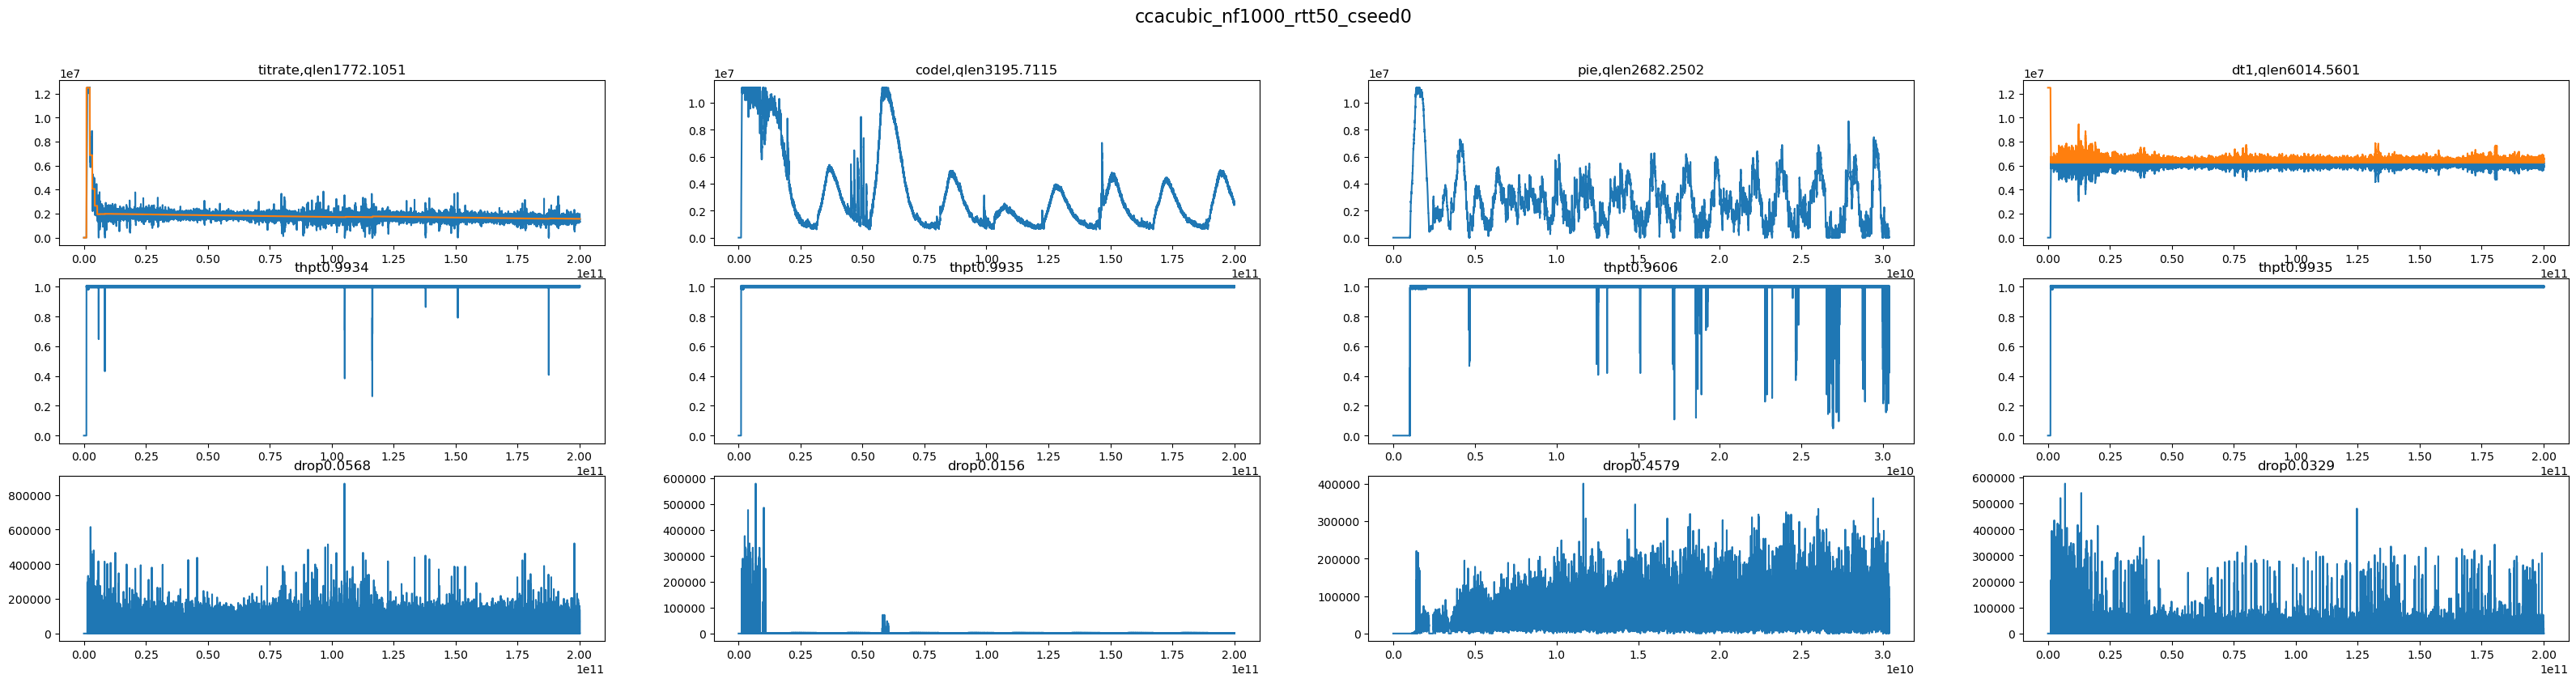

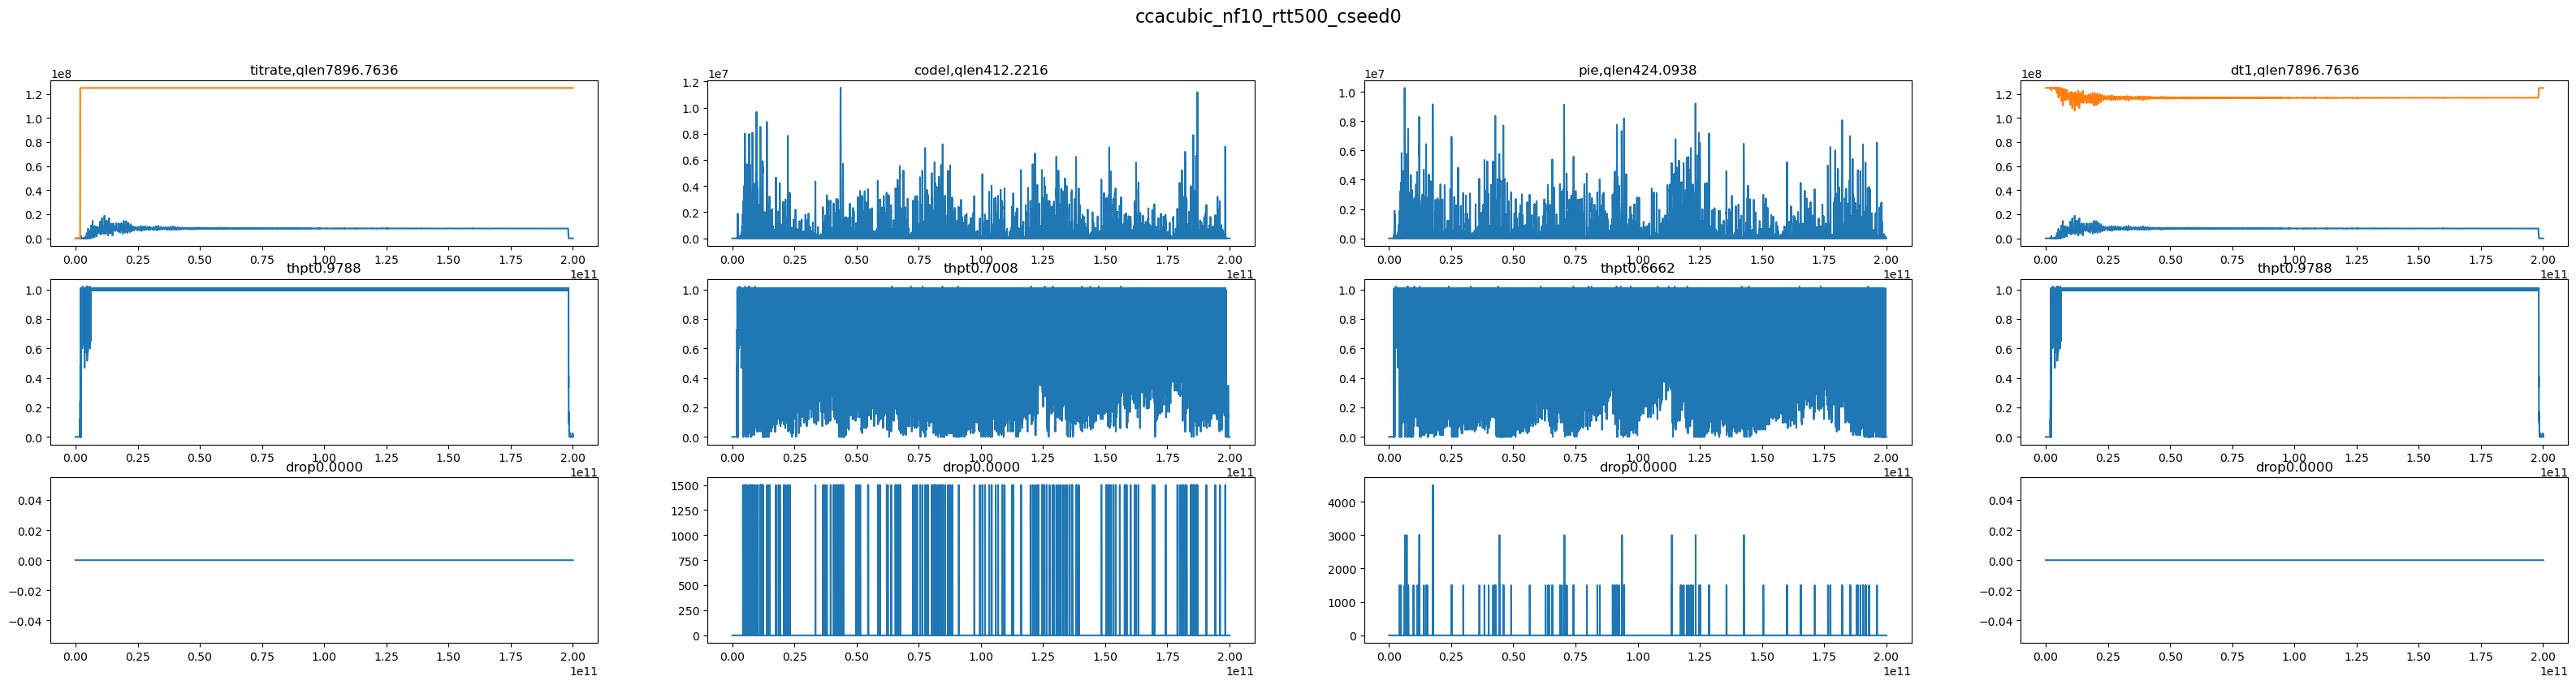

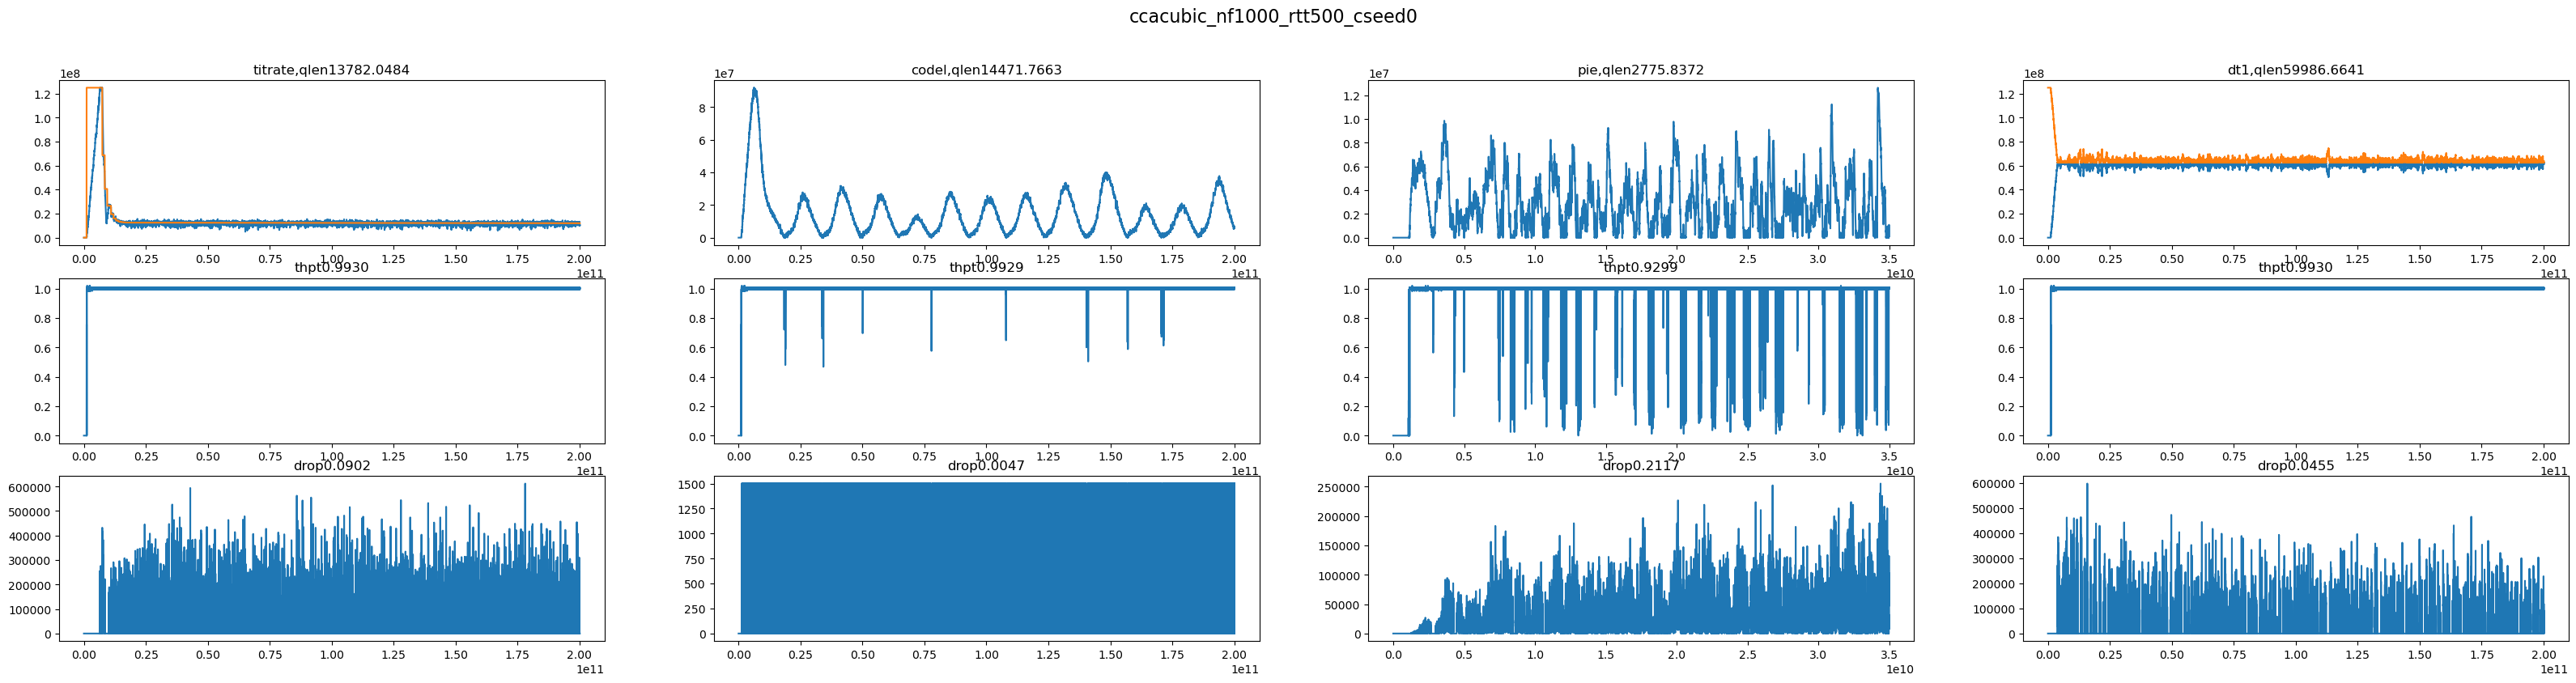

In [10]:
schemearr = ["titrate","codel","pie","dt1"]
arrstart = 0 # 99000 # 0 # 95000
arrend = 500000 # 101000 # 200000 # 105000
# [arrstart:arrend]
nr = 3
nc = len(schemearr)

for ccaname in ccanamearr:
    for rtt in rttarr:
        for numflow in numflowarr:
            if numflow==10 and rtt==50: continue
            configname = f"cca{ccaname}_nf{numflow}_rtt{rtt}_cseed{confseed}"
        
            fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

            for ischeme,scheme in enumerate(schemearr):
                datator = datadict[configname][scheme]

                time = datator[0][arrstart:arrend]
                qlen = datator[1][arrstart:arrend]
                sent = datator[2][arrstart:arrend]
                thpt = datator[3][arrstart:arrend]
                drop = datator[4][arrstart:arrend]
                thres = datator[5][arrstart:arrend]

                axs[0,ischeme].plot(time,qlen)
                if scheme=="titrate" or scheme=="dt1": axs[0,ischeme].plot(time,thres)
                axs[0,ischeme].set_title(f"{scheme},qlen{sum(qlen)/len(qlen)/1000:.4f}")
                axs[1,ischeme].plot(time,thpt)
                axs[1,ischeme].set_title(f"thpt{sum(thpt)/len(thpt):.4f}")
                axs[2,ischeme].plot(time,drop)
                axs[2,ischeme].set_title(f"drop{sum(drop)/sum(sent):.4f}")
            fig.suptitle(configname, fontsize=16)